### Car-Price-Prediction-ML

In [383]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [384]:
#read the data
data = pd.read_csv("car_price.csv")

In [385]:
data = data.iloc[: , 1:]

In [386]:
data

,brand,model,varient,mf_year,dr_kms,fuel_type,no_of_owners,location,transmission,price
0,Hyundai,Elite i20,Asta 1.2,2015,"72,000 km",Petrol,1st,Bengaluru,Manual,"₹ 6,25,000"
1,Maruti Suzuki,Omni,5 Seater,2017,"24,000 km",Petrol,2nd,Bengaluru,Manual,"₹ 2,90,000"
2,Maruti Suzuki,Swift Dzire,VDI,2017,"91,000 km",Diesel,1st,Bengaluru,Manual,"₹ 7,10,000"
3,Skoda,Rapid,1.5 TDI Manual active ambition style,2012,"86,000 km",Diesel,2nd,Bengaluru,Manual,"₹ 4,15,000"
4,Maruti Suzuki,Wagon R,LXI,2014,"66,000 km",Petrol,1st,Bengaluru,Manual,"₹ 3,95,000"
...,...,...,...,...,...,...,...,...,...,...
5776,Maruti,Swift,ZDI,2015,"83,000 kms",Diesel,First Owner,pune,Manual,6.15 Lakh*
5777,Hyundai,i20,Petrol CVT Asta,2018,"17,908 Kms",Petrol,1st Owner,pune,Automatic,"₹ 7,65,500"
5778,Maruti,Vitara,Brezza ZDi,2018,"43,089 kms",Diesel,First Owner,pune,Manual,9.2 Lakh*
5779,Hyundai,i20,Sportz 1.2,2013,"52,230 kms",Petrol,First Owner,pune,Manual,4.45 Lakh*


In [387]:
#checking null values
data.isnull().sum()

brand            0
model           67
varient          6
mf_year          0
dr_kms           0
fuel_type        0
no_of_owners     0
location         0
transmission    91
price            0
dtype: int64

In [388]:
#droping the null rows
data = data.dropna()

In [389]:
data

,brand,model,varient,mf_year,dr_kms,fuel_type,no_of_owners,location,transmission,price
0,Hyundai,Elite i20,Asta 1.2,2015,"72,000 km",Petrol,1st,Bengaluru,Manual,"₹ 6,25,000"
1,Maruti Suzuki,Omni,5 Seater,2017,"24,000 km",Petrol,2nd,Bengaluru,Manual,"₹ 2,90,000"
2,Maruti Suzuki,Swift Dzire,VDI,2017,"91,000 km",Diesel,1st,Bengaluru,Manual,"₹ 7,10,000"
3,Skoda,Rapid,1.5 TDI Manual active ambition style,2012,"86,000 km",Diesel,2nd,Bengaluru,Manual,"₹ 4,15,000"
4,Maruti Suzuki,Wagon R,LXI,2014,"66,000 km",Petrol,1st,Bengaluru,Manual,"₹ 3,95,000"
...,...,...,...,...,...,...,...,...,...,...
5776,Maruti,Swift,ZDI,2015,"83,000 kms",Diesel,First Owner,pune,Manual,6.15 Lakh*
5777,Hyundai,i20,Petrol CVT Asta,2018,"17,908 Kms",Petrol,1st Owner,pune,Automatic,"₹ 7,65,500"
5778,Maruti,Vitara,Brezza ZDi,2018,"43,089 kms",Diesel,First Owner,pune,Manual,9.2 Lakh*
5779,Hyundai,i20,Sportz 1.2,2013,"52,230 kms",Petrol,First Owner,pune,Manual,4.45 Lakh*


In [390]:
data["brand"].unique()

array(['Hyundai', 'Maruti Suzuki', 'Skoda', 'Ford', 'Mahindra', 'Toyota',
       'Tata', 'Renault', 'Mercedes-Benz', 'Chevrolet', 'Fiat', 'Honda',
       'Ssangyong', 'Volvo', 'Volkswagen', 'BMW', 'Mini', 'Aston Martin',
       'Isuzu', 'Audi', 'MG', 'Force Motors', 'Land Rover', 'Bentley',
       'Nissan', 'Datsun', 'Jaguar', 'Other Brands', 'Hummer',
       'Lamborghini', 'Maserati', 'Mahindra Renault', 'Ferrari',
       'Mitsubishi', 'Kia', 'Premier', 'Jeep', 'Ashok Leyland', 'Daewoo',
       'Ambassador', 'Bajaj', 'Hindustan Motors', 'ICML', 'Maruti',
       'Mercedes', 'KIA', 'Landrover', 'Porsche', 'Land'], dtype=object)

In [391]:
data[data["brand"] == "Land"]

,brand,model,varient,mf_year,dr_kms,fuel_type,no_of_owners,location,transmission,price
4617,Land,Rover,Range Rover 3.6 TDV8 Vogue SE Diesel,2011,"77,000 kms",Diesel,First Owner,bengaluru,Automatic,33 Lakh*
4986,Land,Rover,Discovery Sport TD4 HSE 7S,2018,"52,039 kms",Diesel,First Owner,hyderabad,Automatic,44.75 Lakh*
5244,Land,Rover,Freelander 2 HSE,2013,"90,000 kms",Diesel,Third Owner,jaipur,Automatic,10 Lakh*
5476,Land,Rover,Range Rover Evoque 2.0 TD4 SE Dynamic,2017,"24,500 kms",Diesel,First Owner,new-delhi,Automatic,40.5 Lakh*
5508,Land,Rover,Discovery Sport SD4 HSE Luxury,2016,"68,000 kms",Diesel,First Owner,new-delhi,Automatic,33 Lakh*


In [392]:
#changing the Rover model to range rover
data.loc[data["brand"] == "Land", "model"] = 'Range Rover'

D:\PROGRAM_FILES\Anaconda\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [393]:
#From brand names, we understood that Maruti, land rover and mercedes is written in more
#than one format. so we are going to make each of them to single name
data.loc[data["brand"] == "Land", "brand"] = 'Land Rover'
data.loc[data["brand"] == "Landrover", "brand"] = 'Land Rover'
data.loc[data["brand"] == "Maruti Suzuki", "brand"] = 'Maruti'
data.loc[data["brand"] == "Mercedes-Benz", "brand"] = 'Mercedes'

In [394]:
#remove "km" string and convert to integer for driven kilometers column
data["dr_kms"] = data["dr_kms"].apply(lambda x: int(re.sub('[,kms]', '', x.lower())))

<ipython-input-394-9f225a7b855a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["dr_kms"] = data["dr_kms"].apply(lambda x: int(re.sub('[,kms]', '', x.lower())))


In [395]:
data["fuel_type"].unique()

array(['Petrol', 'Diesel', 'LPG', 'CNG & Hybrids', 'Electric',
       'Petrol + LPG', 'Petrol + CNG', 'CNG'], dtype=object)

In [396]:
data["no_of_owners"].unique()

array(['1st', '2nd', '3rd', '4th', '4+', '1st Owner', '2nd Owner',
       '3rd Owner', '4th Owner', 'Second Owner', 'Third Owner',
       'First Owner', 'Fourth & Above Owner', 'Test Drive Car'],
      dtype=object)

In [397]:
#unifying the no of owner information
data.loc[data["no_of_owners"] == "1st", "no_of_owners"] = 'First Owner'
data.loc[data["no_of_owners"] == "2nd", "no_of_owners"] = 'Second Owner'
data.loc[data["no_of_owners"] == "3rd", "no_of_owners"] = 'Third Owner'
data.loc[data["no_of_owners"] == "4th Owner", "no_of_owners"] = 'Fourth Owner'
data.loc[data["no_of_owners"] == "2nd Owner", "no_of_owners"] = 'Second Owner'
data.loc[data["no_of_owners"] == "4+", "no_of_owners"] = 'Fourth & Above Owner'
data.loc[data["no_of_owners"] == "1st Owner", "no_of_owners"] = 'First Owner'
data.loc[data["no_of_owners"] == "3rd Owner", "no_of_owners"] = 'Third Owner'
data.loc[data["no_of_owners"] == "4th", "no_of_owners"] = 'Fourth Owner'

In [398]:
data["no_of_owners"].unique()

array(['First Owner', 'Second Owner', 'Third Owner', 'Fourth Owner',
       'Fourth & Above Owner', 'Test Drive Car'], dtype=object)

In [399]:
data["location"].unique()

array(['Bengaluru', 'Delhi', 'Mumbai', 'Chennai', 'Hyderabad', 'Kochi',
       'Kozhikode', 'Kolkata', 'Coimbatore', 'Goa', 'bengaluru',
       'chennai', 'new-delhi', 'mumbai', 'pune', 'hyderabad', 'kolkata',
       'ahmedabad', 'jaipur', 'chandigarh', 'kozhikode', 'delhi-ncr',
       'gurgaon', 'noida'], dtype=object)

In [400]:
#unifying the location data
data.loc[data["location"] == "bengaluru", "location"] = 'Bengaluru'
data.loc[data["location"] == "new-delhi", "location"] = 'Delhi'
data.loc[data["location"] == "mumbai", "location"] = 'Mumbai'
data.loc[data["location"] == "chennai", "location"] = 'Chennai'
data.loc[data["location"] == "hyderabad", "location"] = 'Hyderabad'
data.loc[data["location"] == "delhi-ncr", "location"] = 'Delhi'
data.loc[data["location"] == "kozhikode", "location"] = 'Kozhikode'
data.loc[data["location"] == "kolkata", "location"] = 'Kolkata'
data.loc[data["location"] == "ahmedabad", "location"] = 'Ahmedabad'
data.loc[data["location"] == "jaipur", "location"] = 'Jaipur'
data.loc[data["location"] == "chandigarh", "location"] = 'Chandigarh'
data.loc[data["location"] == "gurgaon", "location"] = 'Gurgaon'
data.loc[data["location"] == "noida", "location"] = 'Noida'

In [401]:
data["location"].unique()

array(['Bengaluru', 'Delhi', 'Mumbai', 'Chennai', 'Hyderabad', 'Kochi',
       'Kozhikode', 'Kolkata', 'Coimbatore', 'Goa', 'pune', 'Ahmedabad',
       'Jaipur', 'Chandigarh', 'Gurgaon', 'Noida'], dtype=object)

In [402]:
data["transmission"].value_counts()

Manual          2487
MANUAL          2171
Automatic        606
AUTOMATIC        150
MH-02-x-xxxx      25
                ... 
KA04               1
KA05               1
MH-09-x-xxxx       1
KA-05-x-xxxx       1
UP-17-x-xxxx       1
Name: transmission, Length: 73, dtype: int64

In [403]:
data.loc[data["transmission"] == "Manual", "transmission"] = 'MANUAL'
data.loc[data["transmission"] == "Automatic", "transmission"] = 'AUTOMATIC'

In [404]:
data["transmission"].value_counts()

MANUAL          4658
AUTOMATIC        756
MH-02-x-xxxx      25
MH-04-x-xxxx      15
DL-3C-x-xxxx       8
                ... 
KA05               1
HR-45-x-xxxx       1
KA-05-x-xxxx       1
RJ-29-x-xxxx       1
KA04               1
Name: transmission, Length: 71, dtype: int64

In [405]:
#removing the wrongly scraped data from transmission column
data = data.loc[(data["transmission"] == "MANUAL") | (data["transmission"] == "AUTOMATIC")]

In [406]:
data["transmission"].value_counts()

MANUAL       4658
AUTOMATIC     756
Name: transmission, dtype: int64

In [407]:
#remove unwanted letters and charecters from price and convert into int

In [408]:
data["price"] = data["price"].apply(lambda x: re.sub('[,₹*]', '', x.lower()))

<ipython-input-408-ad1b6e5e3d18>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["price"] = data["price"].apply(lambda x: re.sub('[,₹*]', '', x.lower()))


In [409]:
data["price"]

0          625000
1          290000
2          710000
3          415000
4          395000
          ...    
5776    6.15 lakh
5777       765500
5778     9.2 lakh
5779    4.45 lakh
5780    5.95 lakh
Name: price, Length: 5414, dtype: object

In [410]:
data["price"] = data["price"].apply(lambda x: int(float(x.split()[0])*100000) if "lak" in x.lower() else int(x))

<ipython-input-410-003e7237cfa1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["price"] = data["price"].apply(lambda x: int(float(x.split()[0])*100000) if "lak" in x.lower() else int(x))


In [411]:
data["price"]

0       625000
1       290000
2       710000
3       415000
4       395000
         ...  
5776    615000
5777    765500
5778    919999
5779    445000
5780    595000
Name: price, Length: 5414, dtype: int64

In [412]:
#EDA

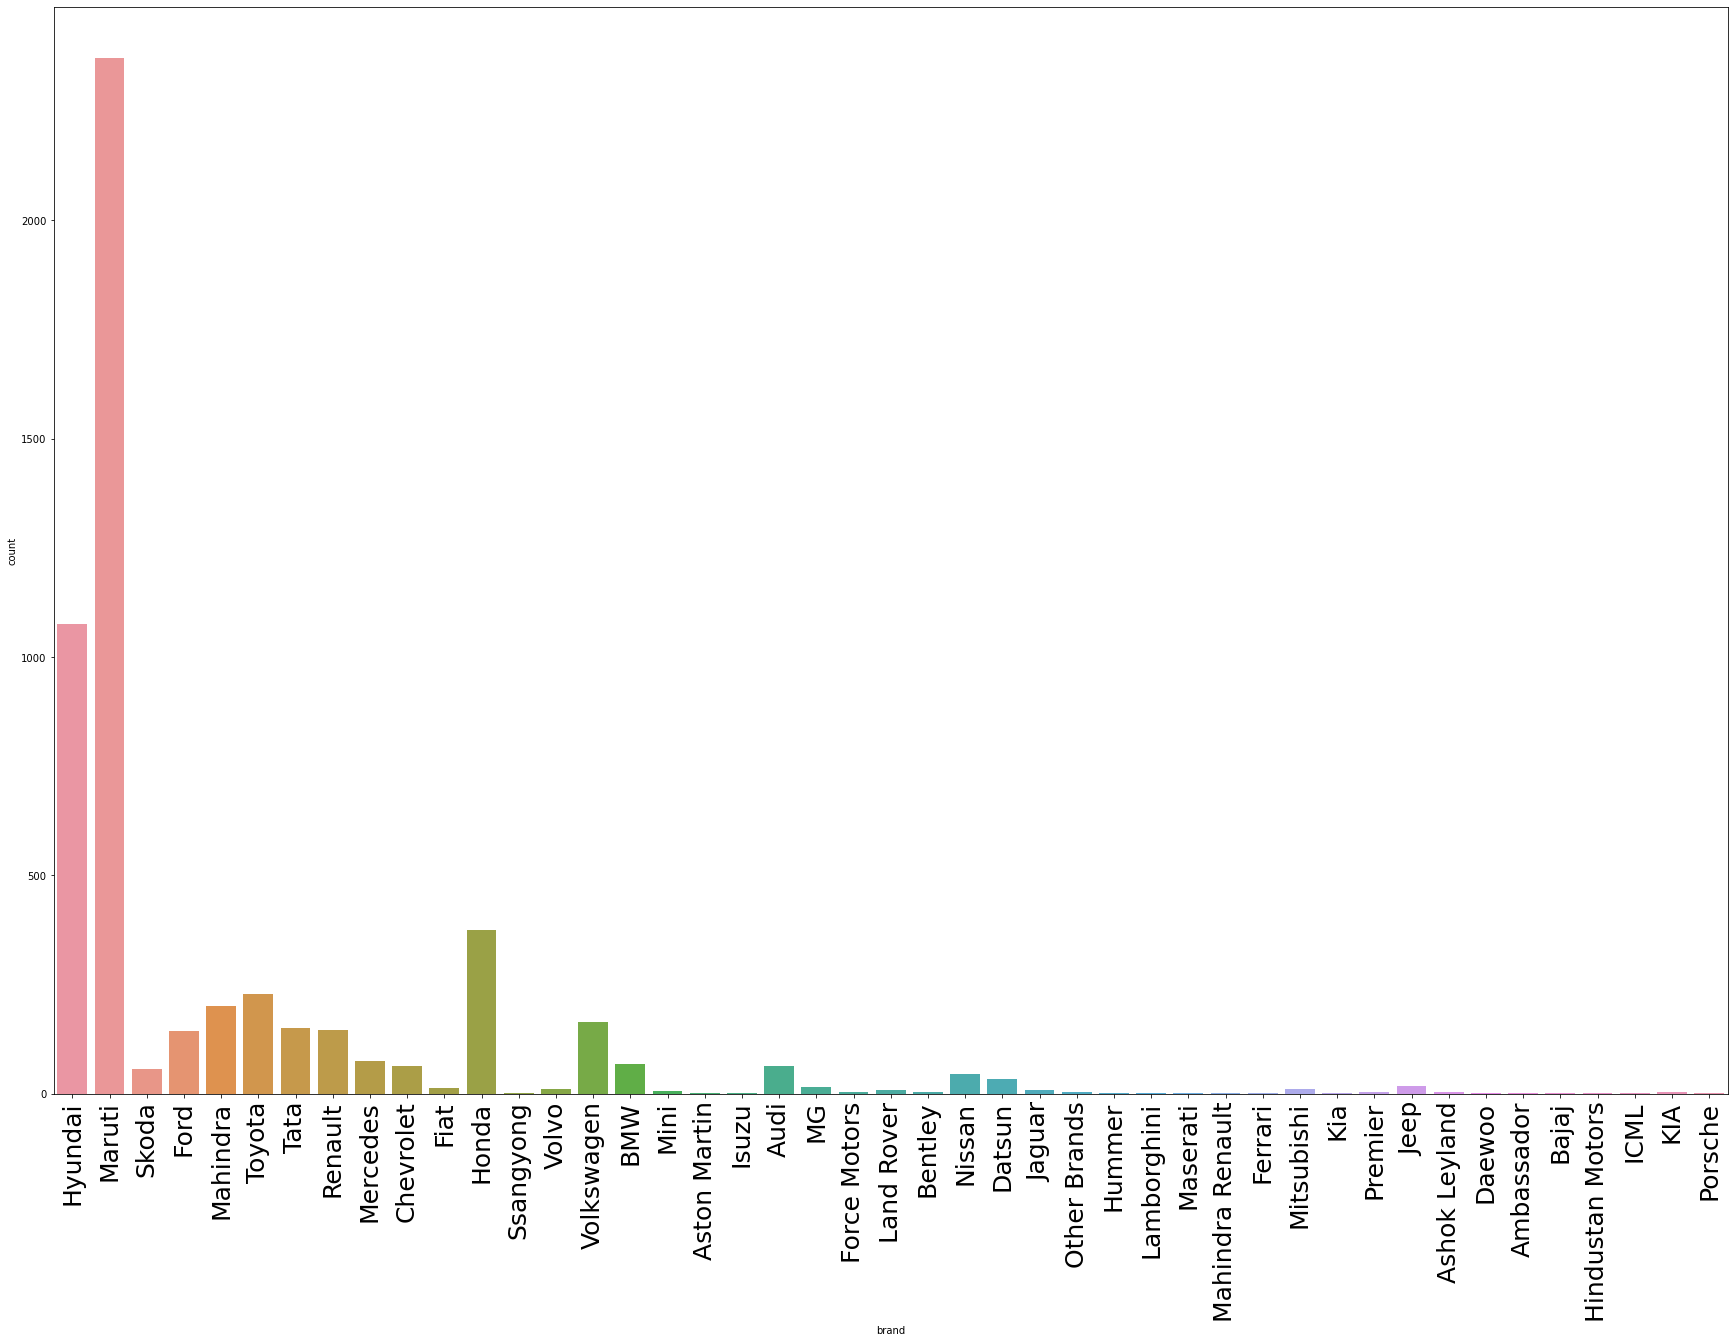

In [413]:
plt.figure(figsize=(30,20))
chart = sns.countplot(data.brand)
chart.tick_params(axis='x', rotation=90, labelsize = 25)

In [414]:
#Most of the vehicles in used car industry are Maruti and Hyundai

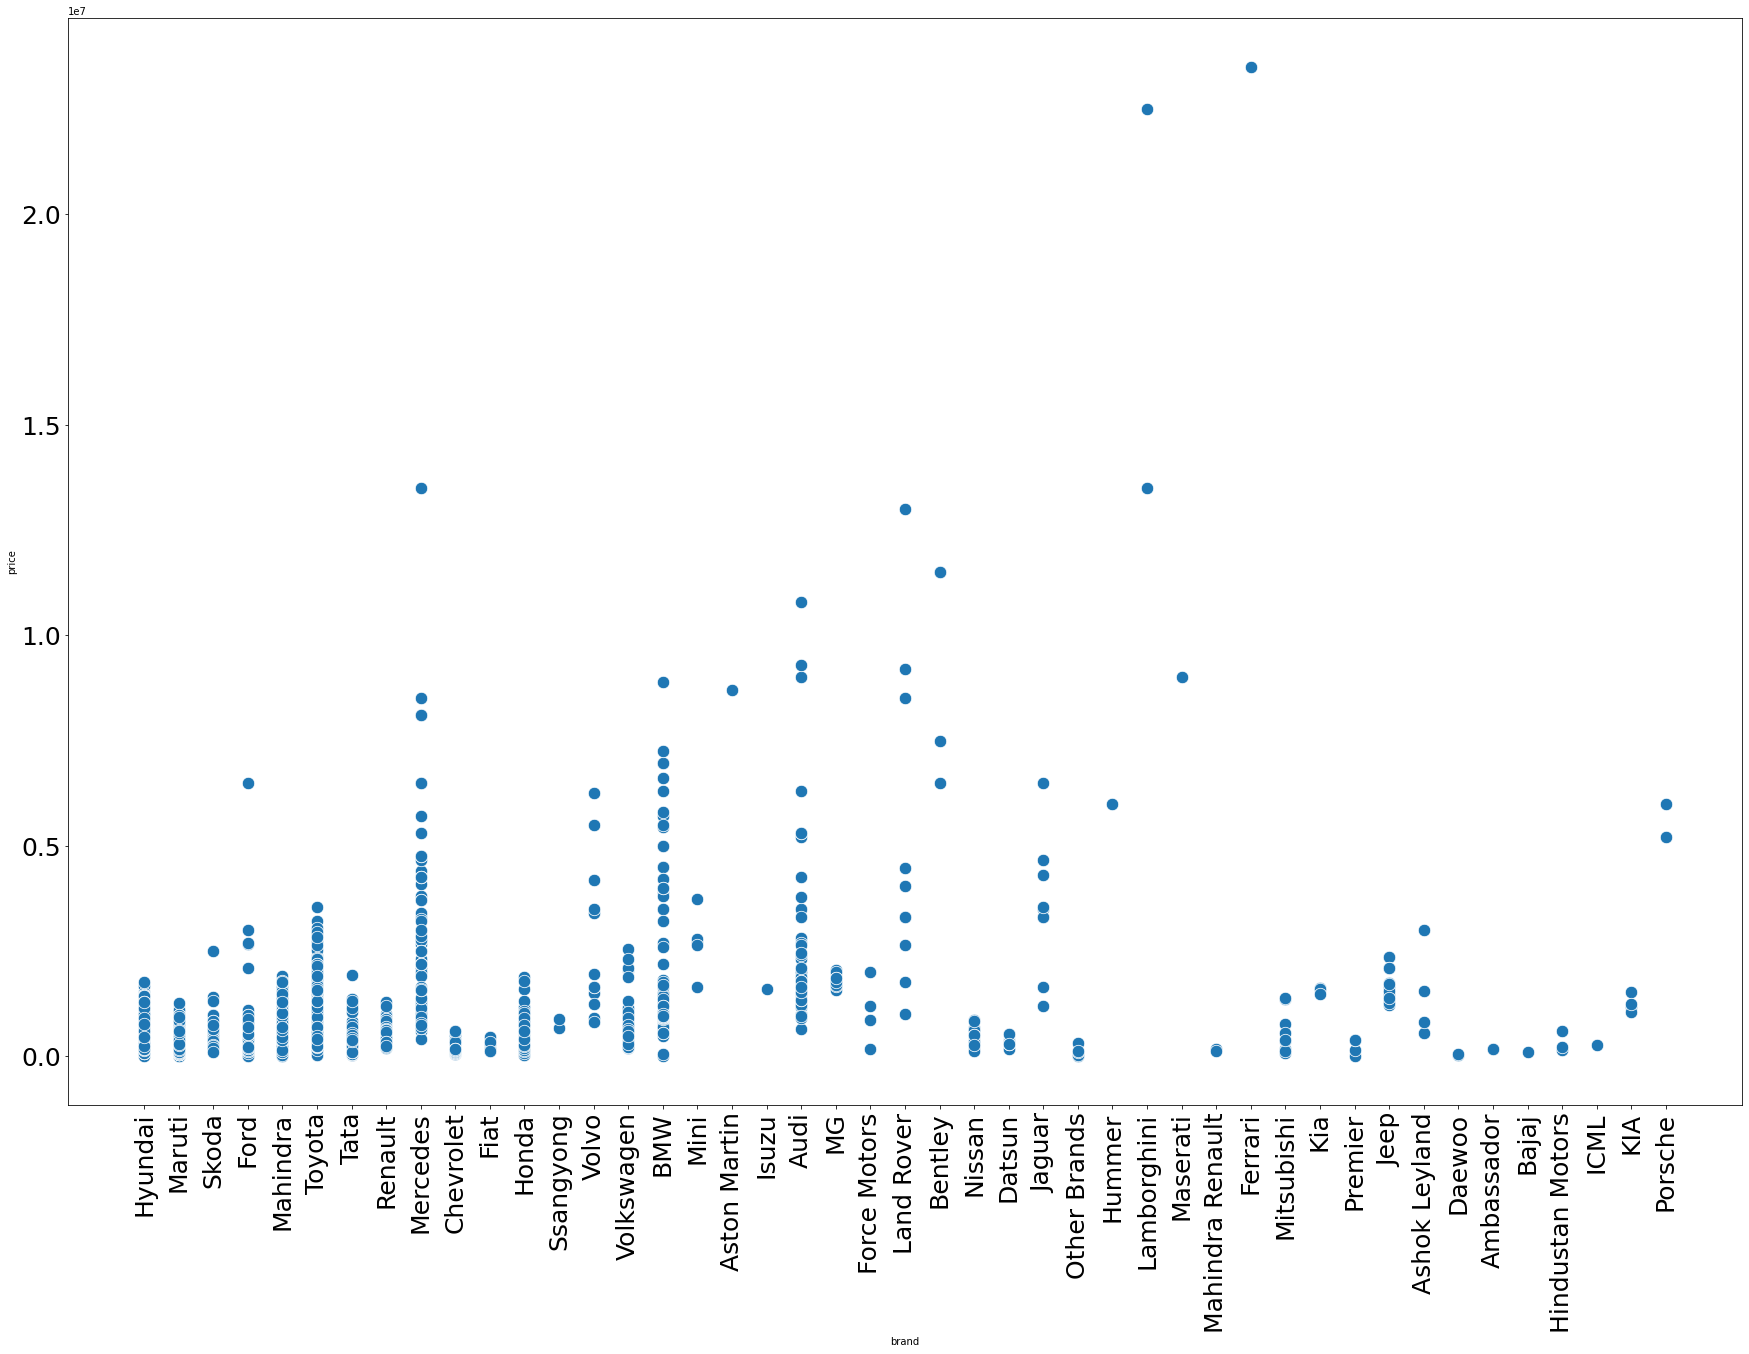

In [415]:
plt.figure(figsize=(30,20))
chart = sns.scatterplot(data.brand, data.price, s=155)
chart.tick_params(axis='x', rotation=90, labelsize = 25)
chart.tick_params(axis='y',  labelsize = 25)

In [416]:
#Premium vehicles are very less
# The most expensive cars are  ferrari and lamborghini
#hyundai, datsun, and maruti are some of the budget friendly brands

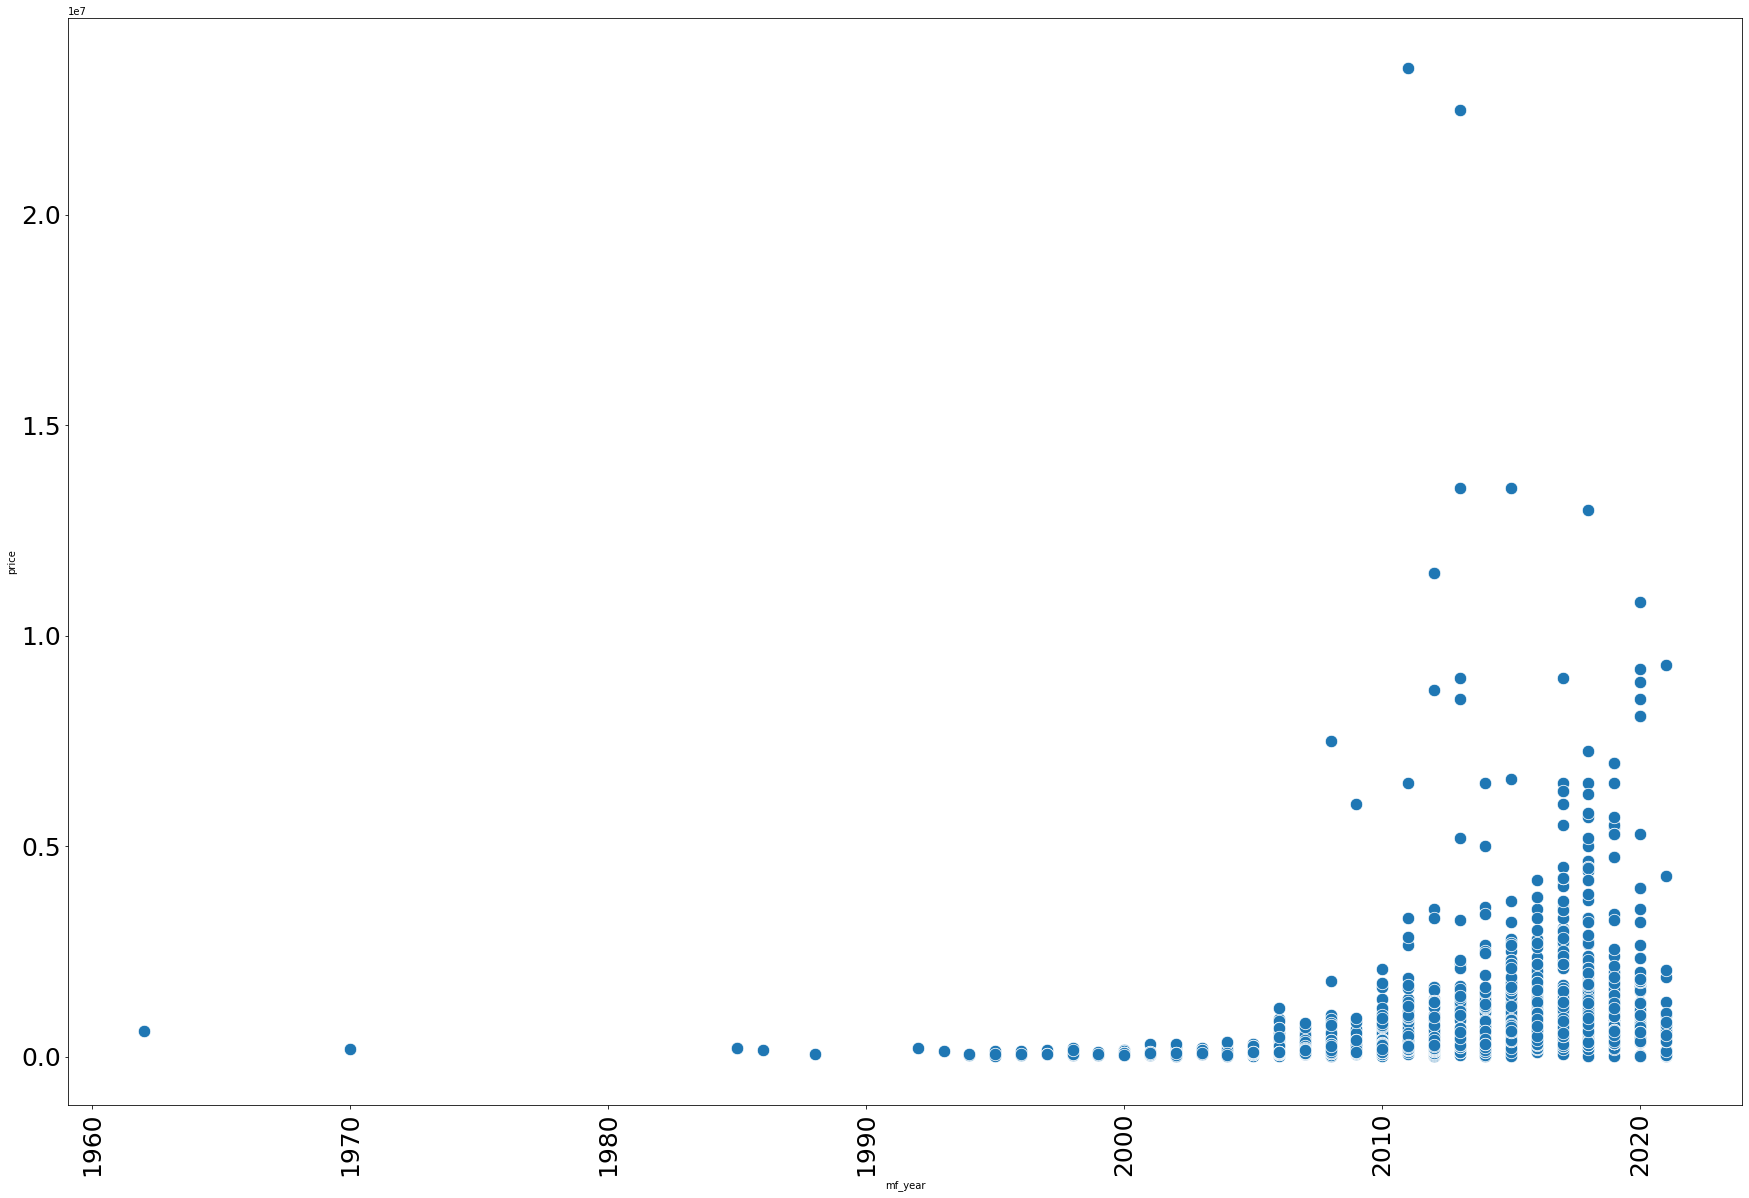

In [417]:
plt.figure(figsize=(30,20))
chart = sns.scatterplot(data.mf_year, data.price, s=155)
chart.tick_params(axis='x', rotation=90, labelsize = 25)
chart.tick_params(axis='y',  labelsize = 25)

In [418]:
#lesser the age of the vehicle higher will be the price

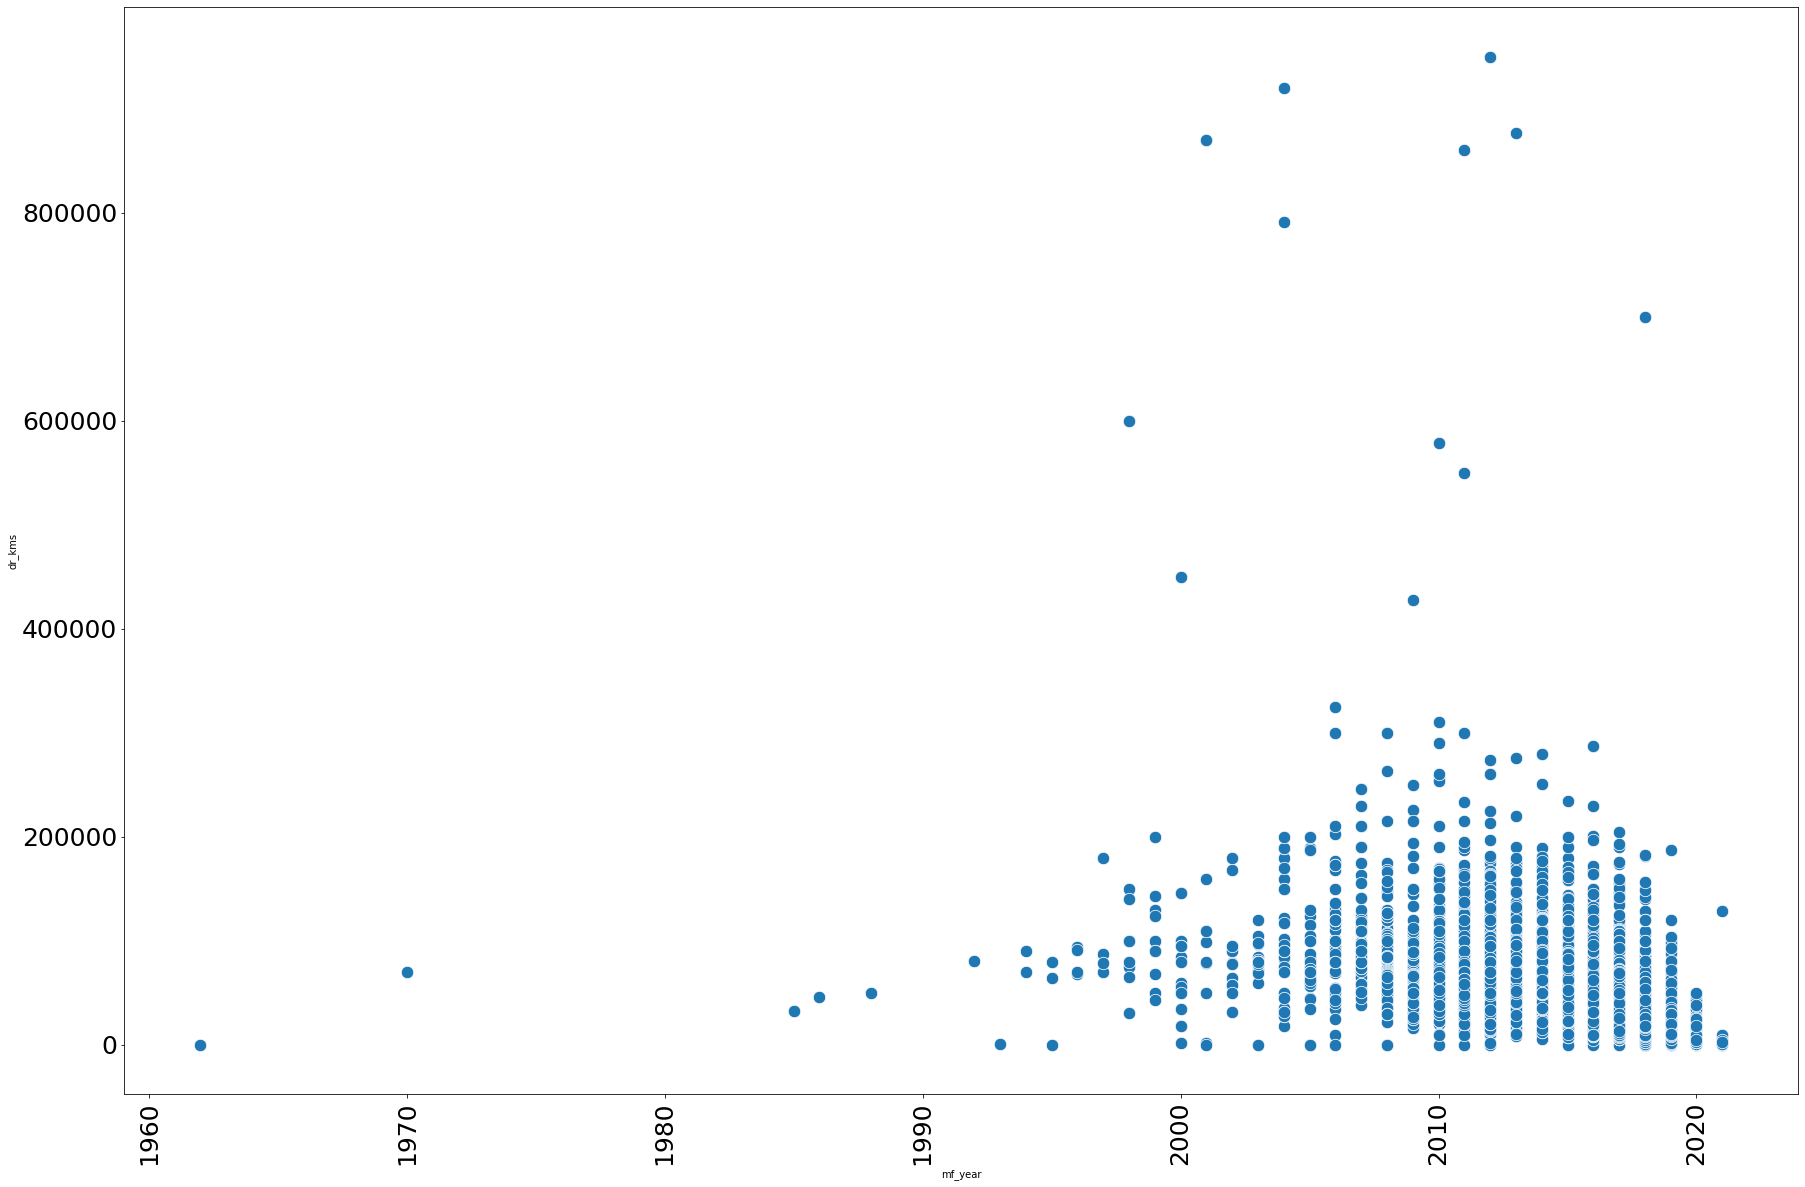

In [419]:
plt.figure(figsize=(30,20))
chart = sns.scatterplot(data.mf_year, data.dr_kms, s=155)
chart.tick_params(axis='x', rotation=90, labelsize = 25)
chart.tick_params(axis='y',  labelsize = 25)

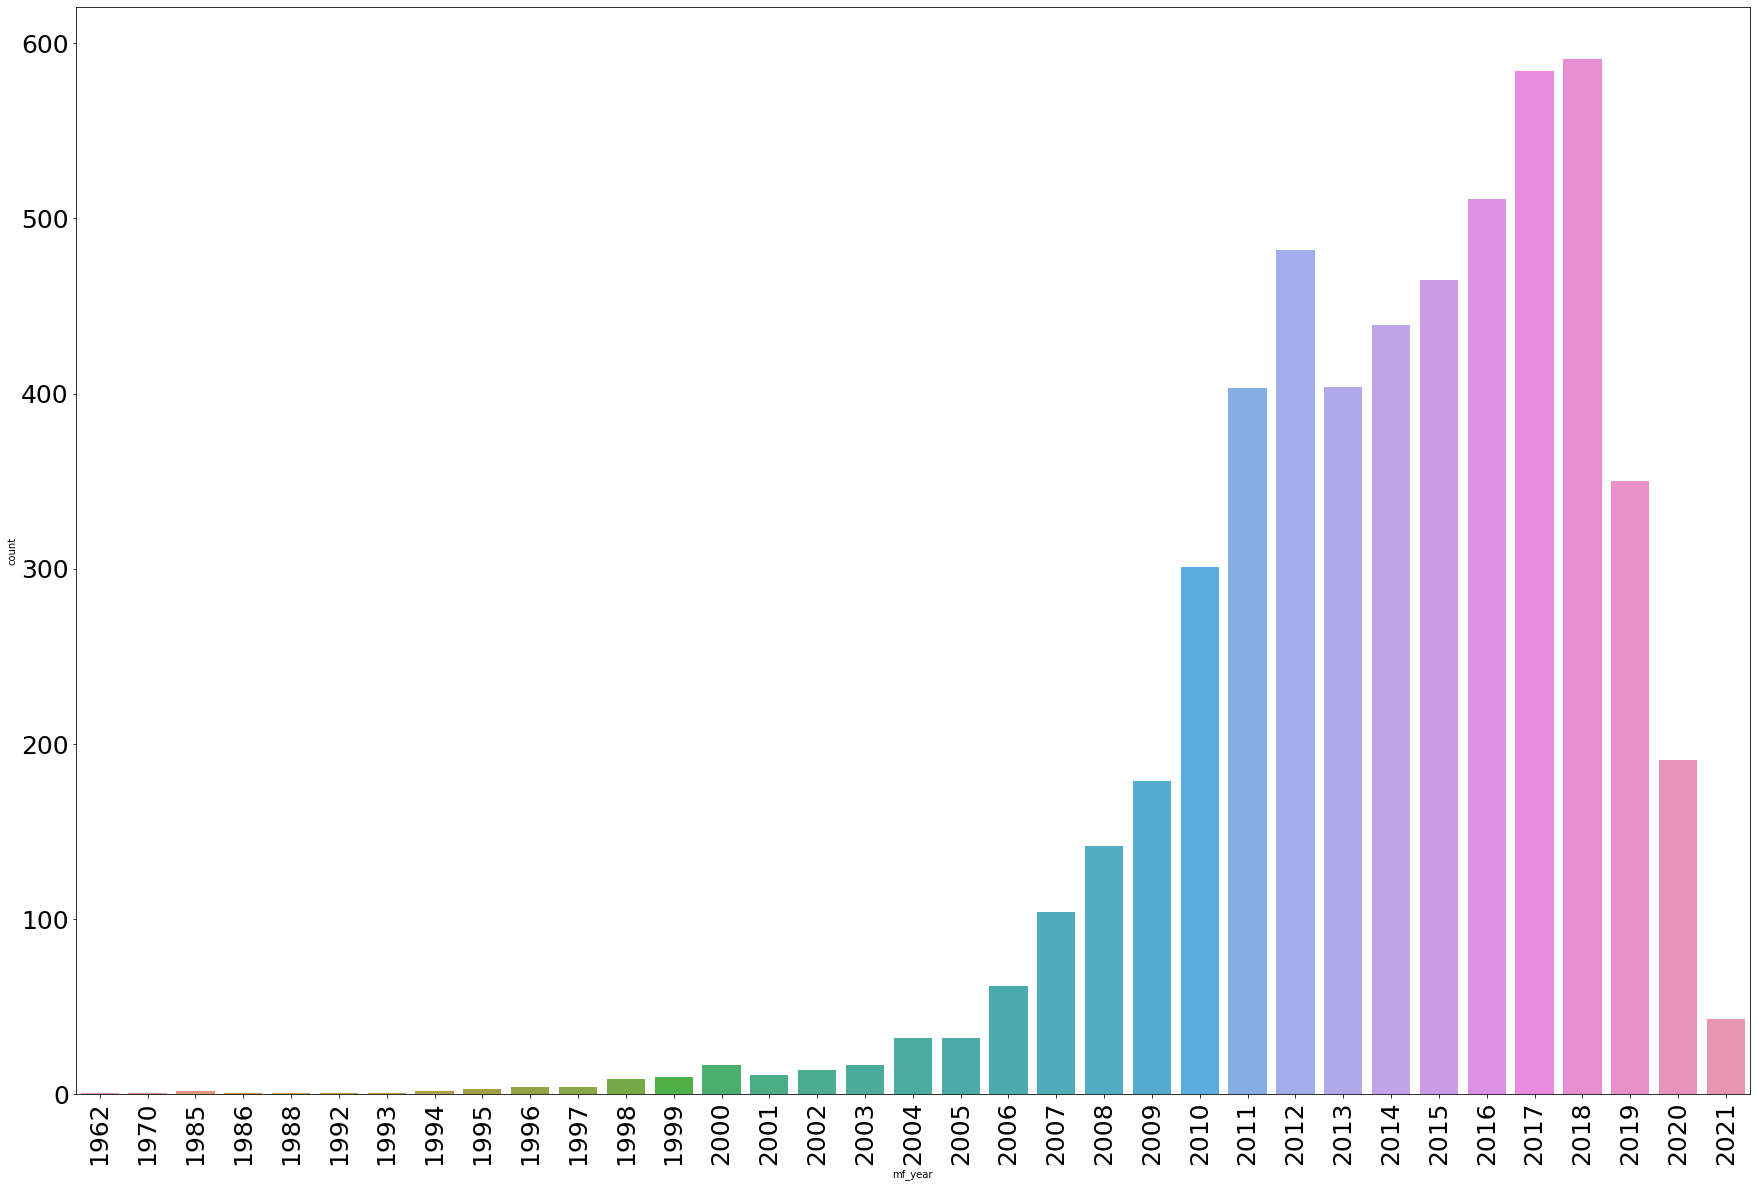

In [420]:
plt.figure(figsize=(30,20))
chart = sns.countplot(data.mf_year)
chart.tick_params(axis='x', rotation=90, labelsize = 25)
chart.tick_params(axis='y',  labelsize = 25)

In [421]:
#we can wee that the purchasing of vehicles started booming around 2010
#from 2018, it has been started to decline

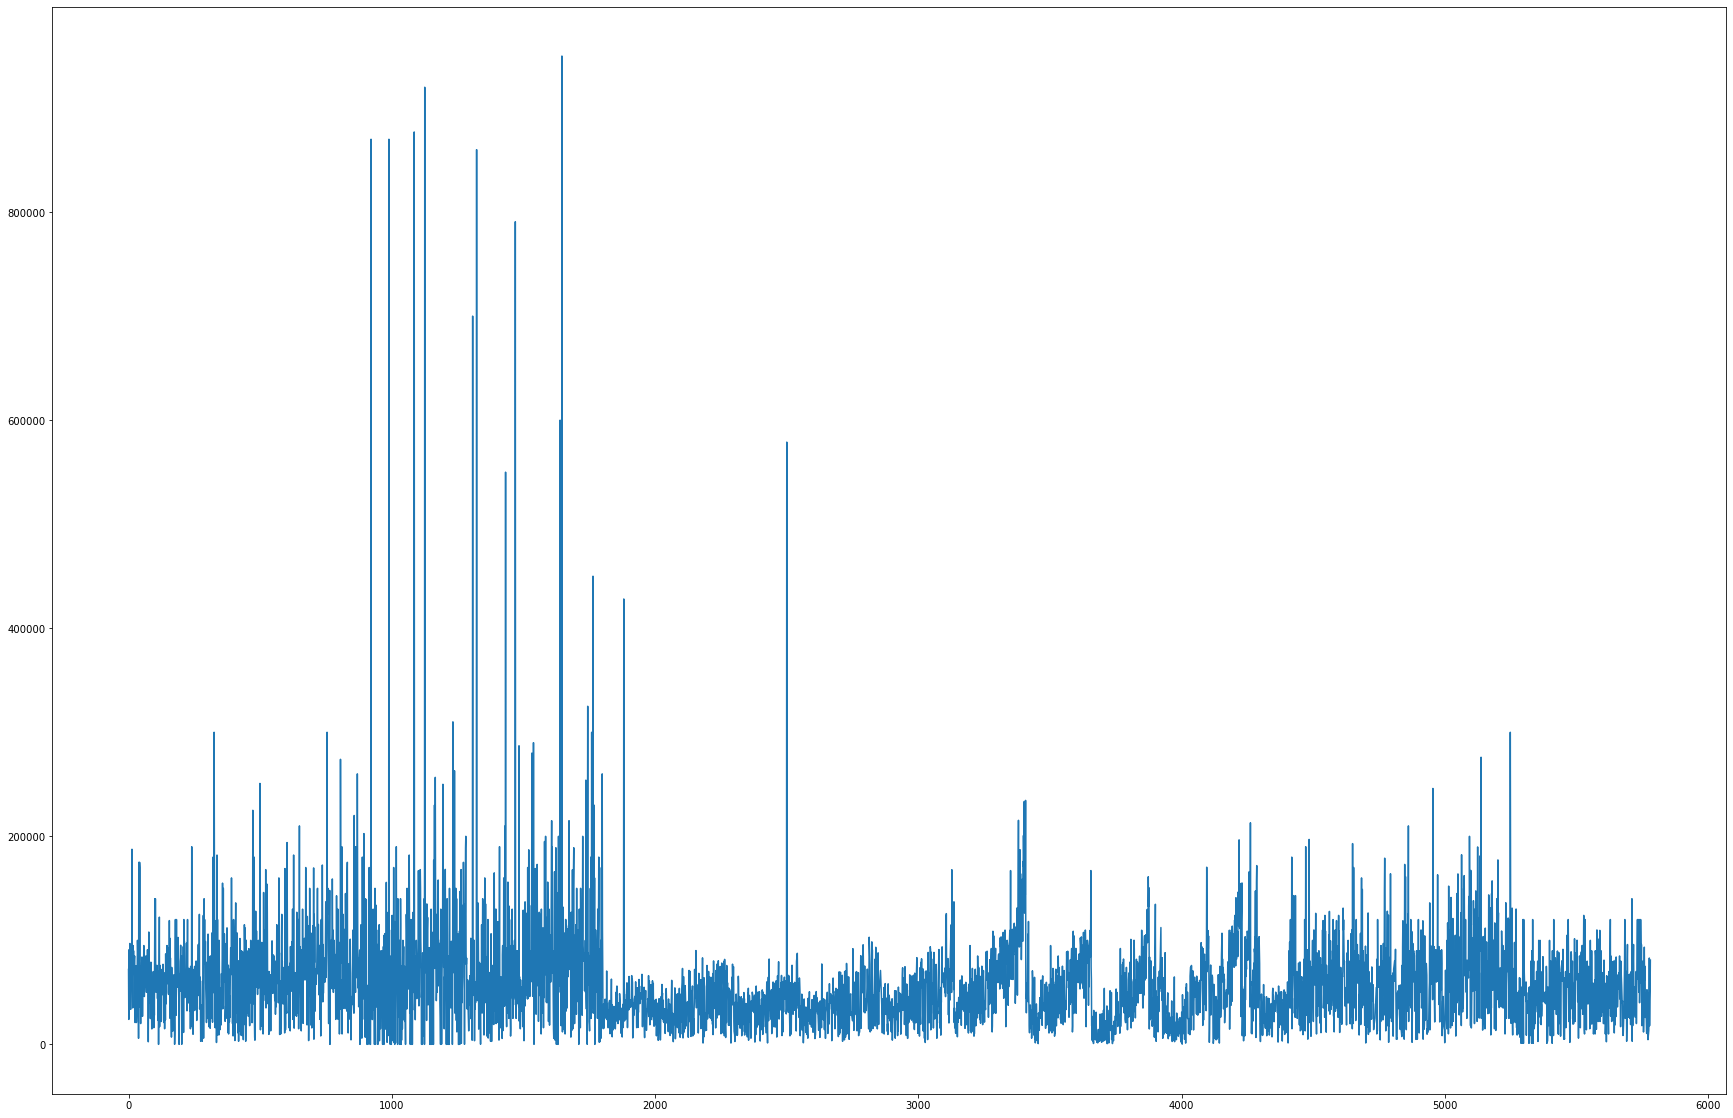

In [422]:
plt.figure(figsize=(30,20))
plt.plot(data.dr_kms)

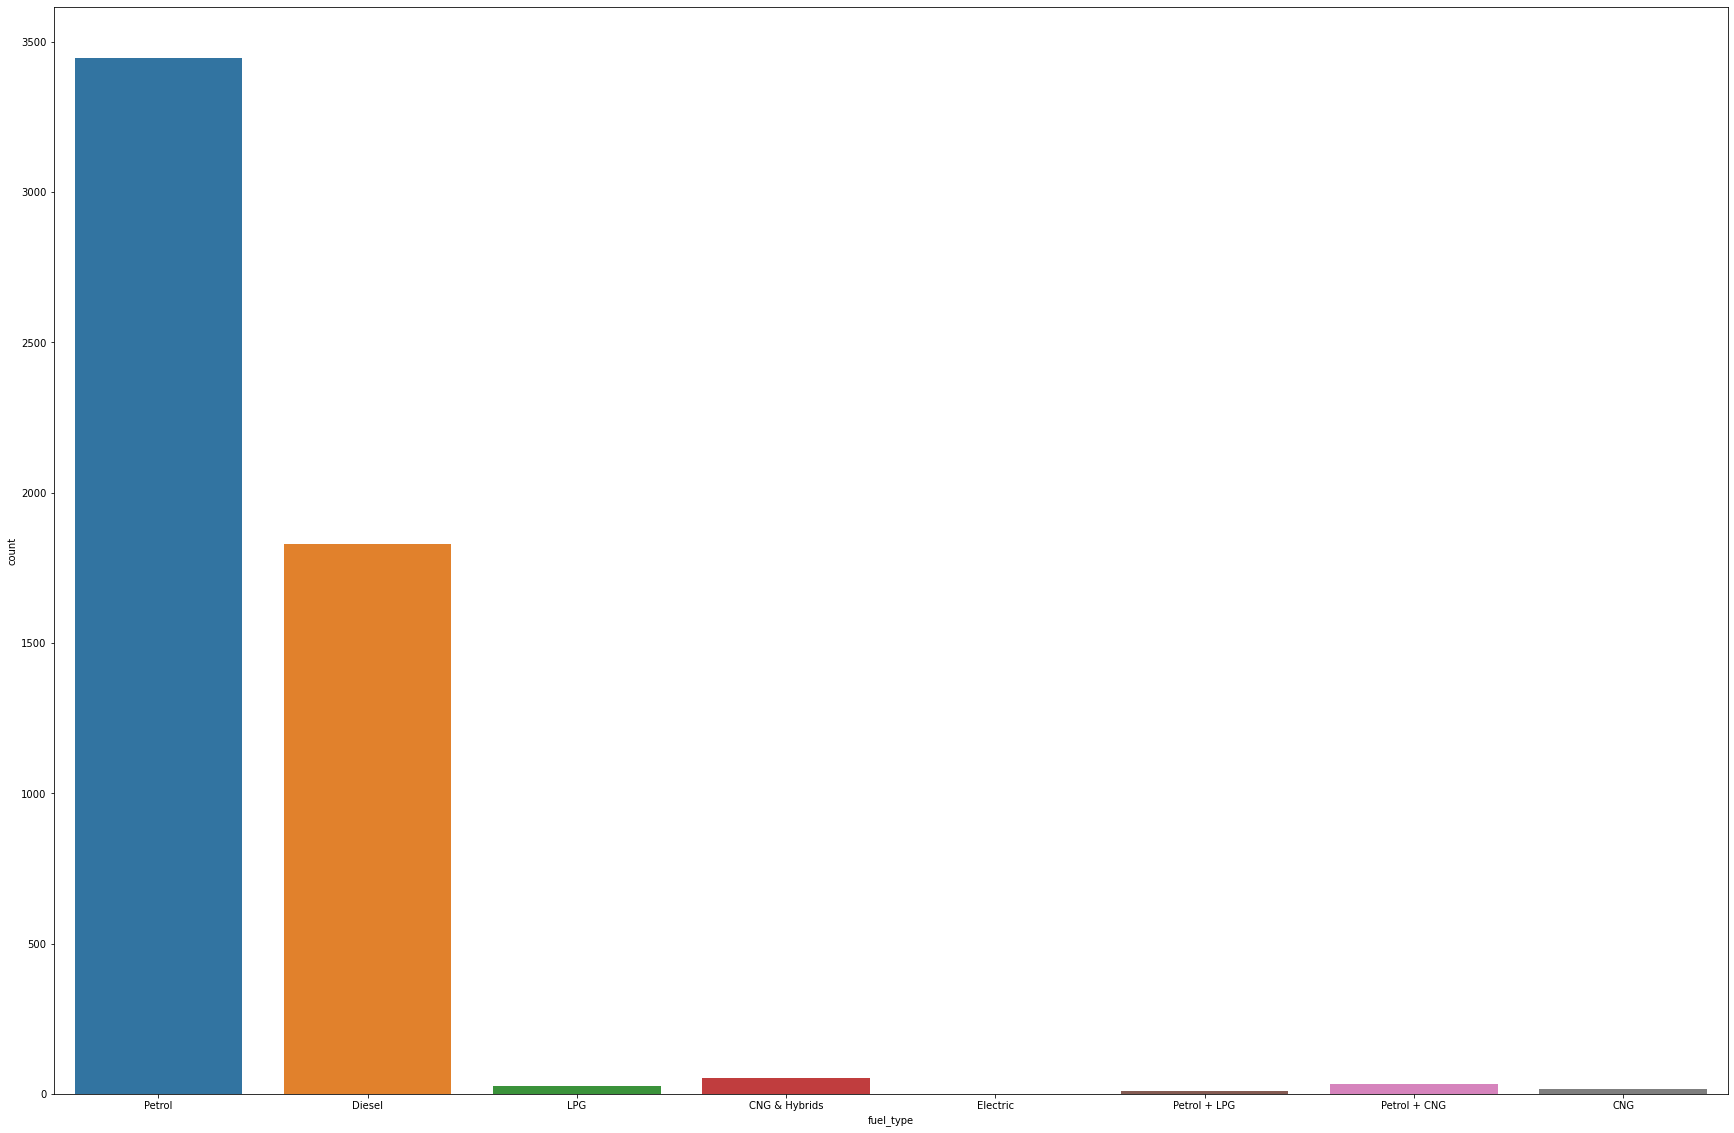

In [423]:
plt.figure(figsize=(30,20))
sns.countplot(data.fuel_type)

In [424]:
#most of the vehicles are petrol
#gas or hybrid vehicles are very less
#no electric vehicles in our dataset

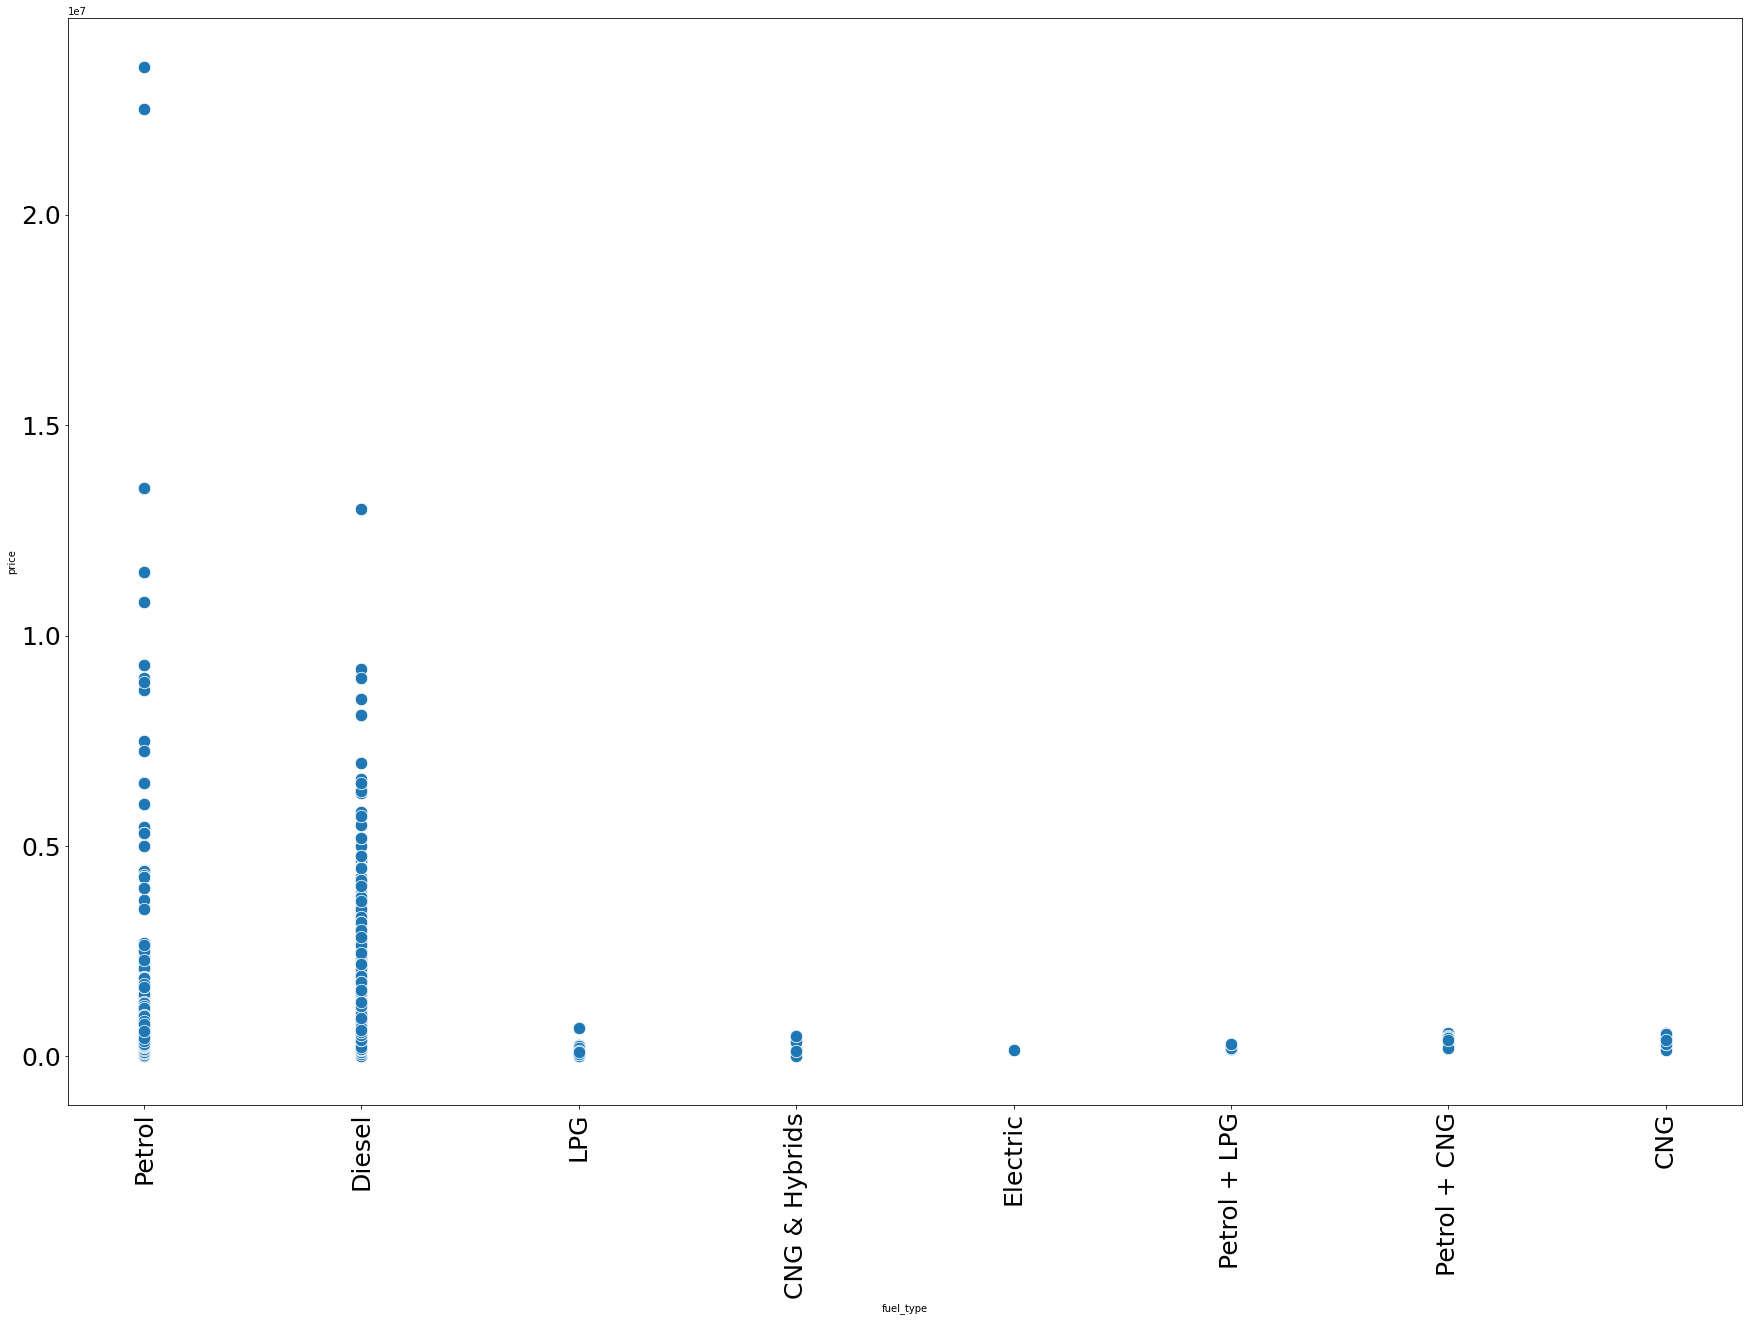

In [425]:
plt.figure(figsize=(30,20))
chart = sns.scatterplot(data.fuel_type, data.price, s=155)
chart.tick_params(axis='x', rotation=90, labelsize = 25)
chart.tick_params(axis='y',  labelsize = 25)

In [426]:
#In used car industry, uncommon fueled vehicles are cheaper(CNG, LPG etc) than petrol and diesel

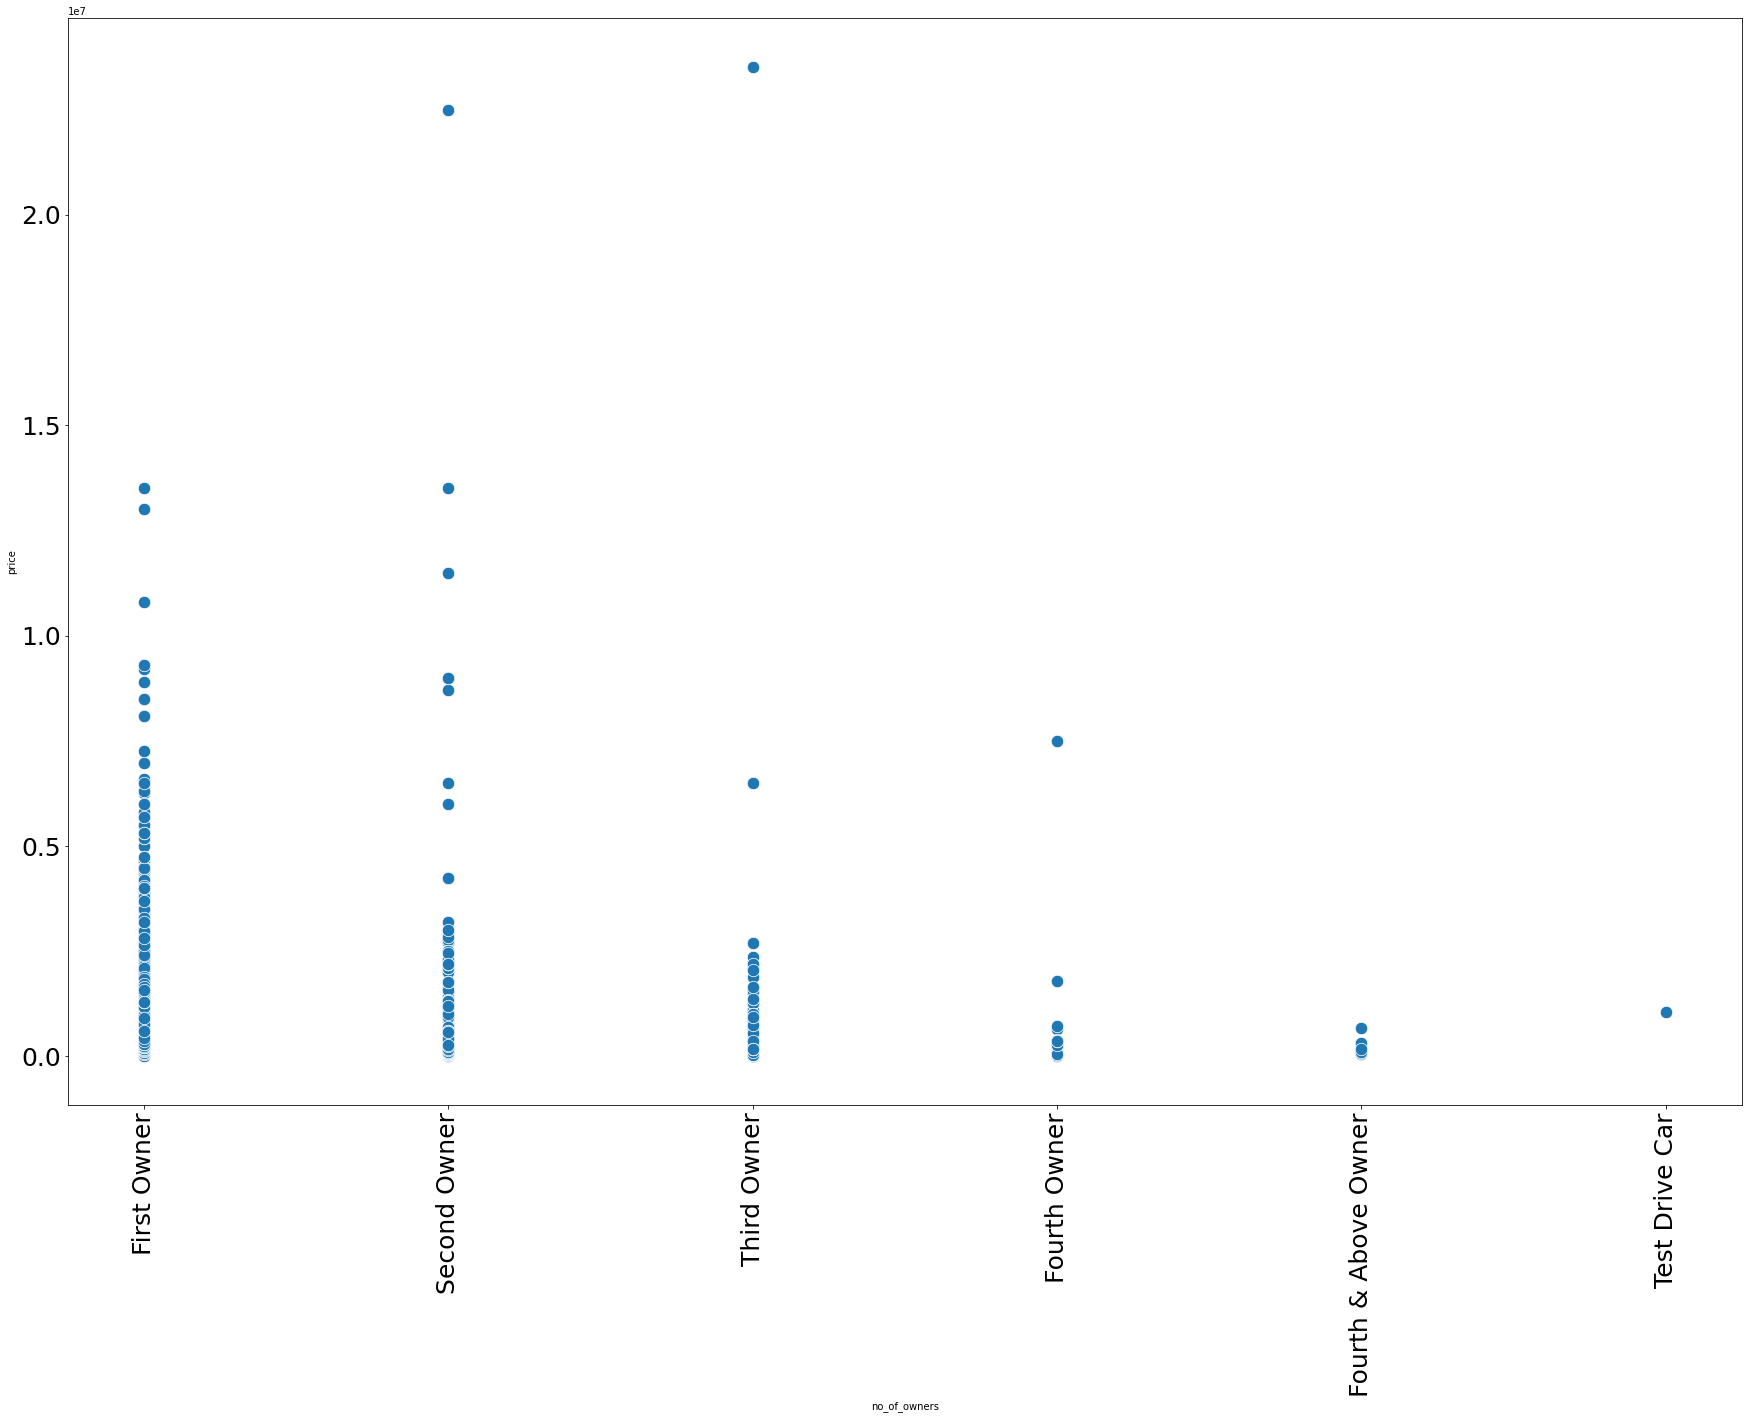

In [427]:
plt.figure(figsize=(30,20))
chart = sns.scatterplot(data.no_of_owners, data.price, s=155)
chart.tick_params(axis='x', rotation=90, labelsize = 25)
chart.tick_params(axis='y',  labelsize = 25)

In [428]:
#generally we can say that when no. of owners increases, price decreases

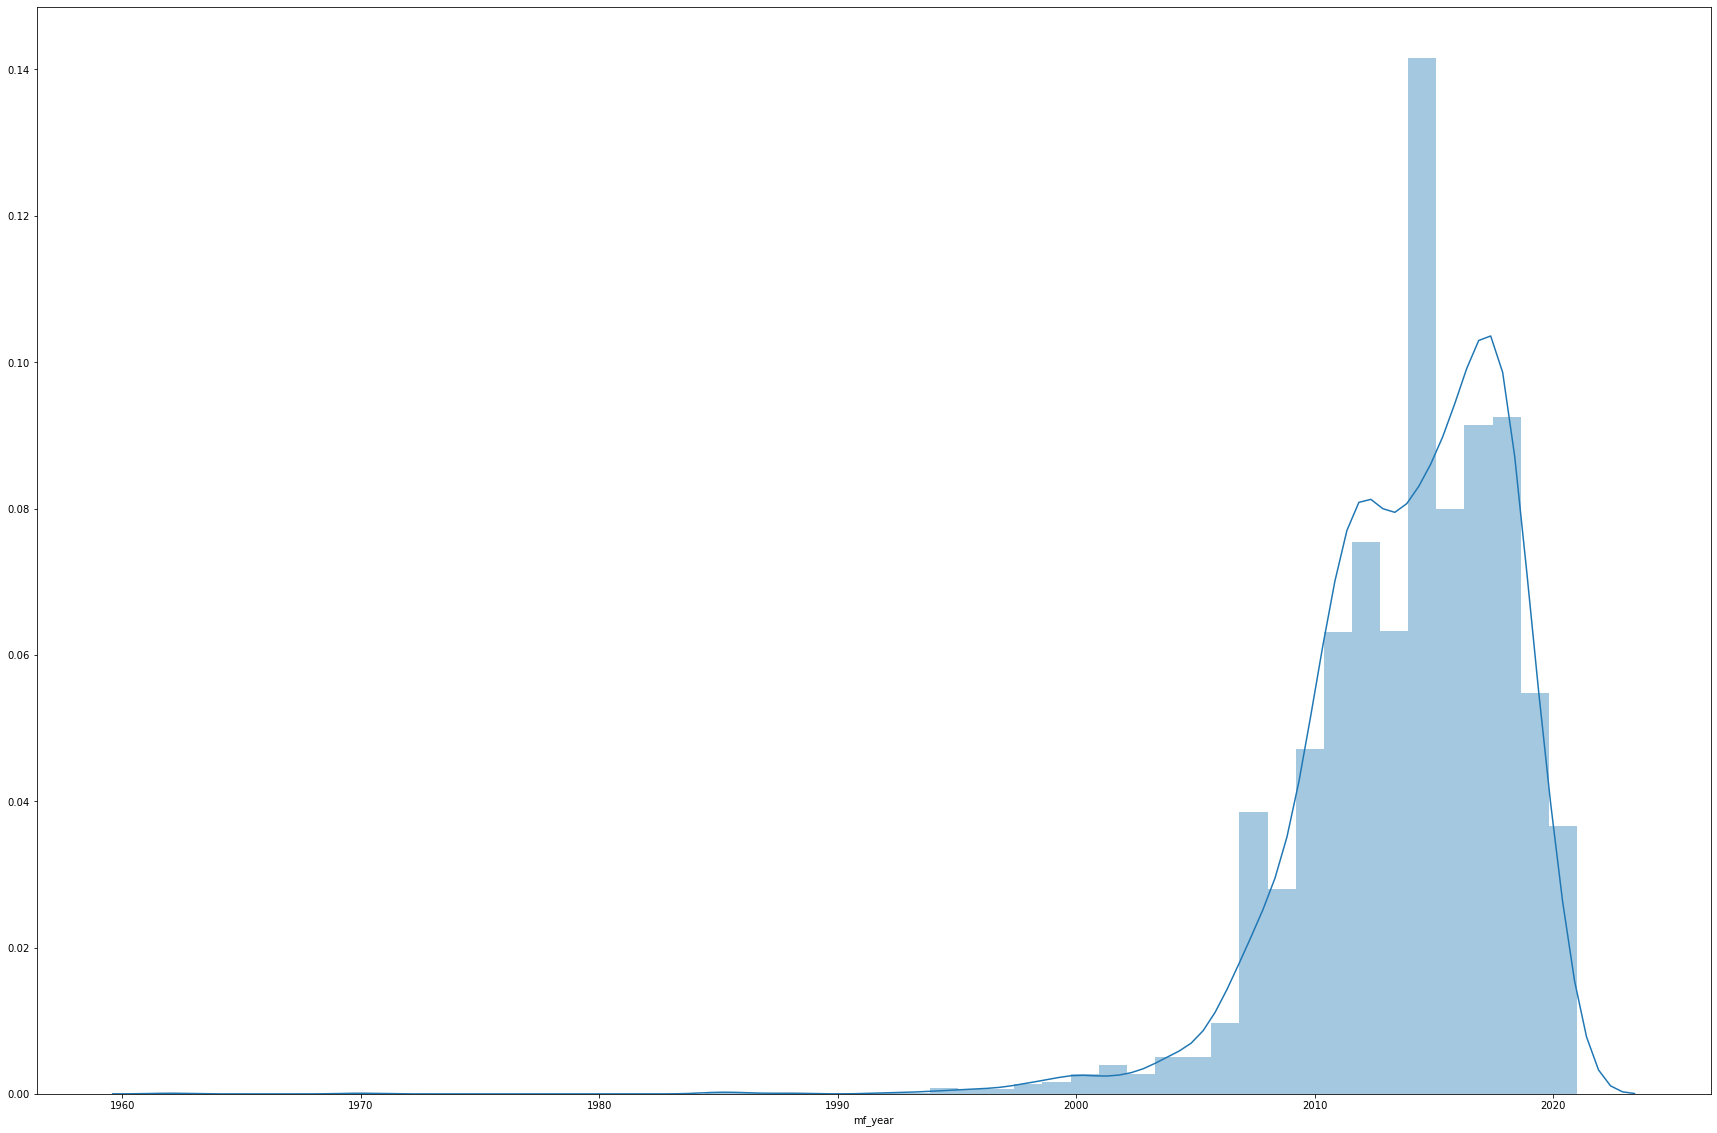

In [429]:
plt.figure(figsize=(30,20))
sns.distplot(data.mf_year)

In [430]:
#mf_year is right skewed

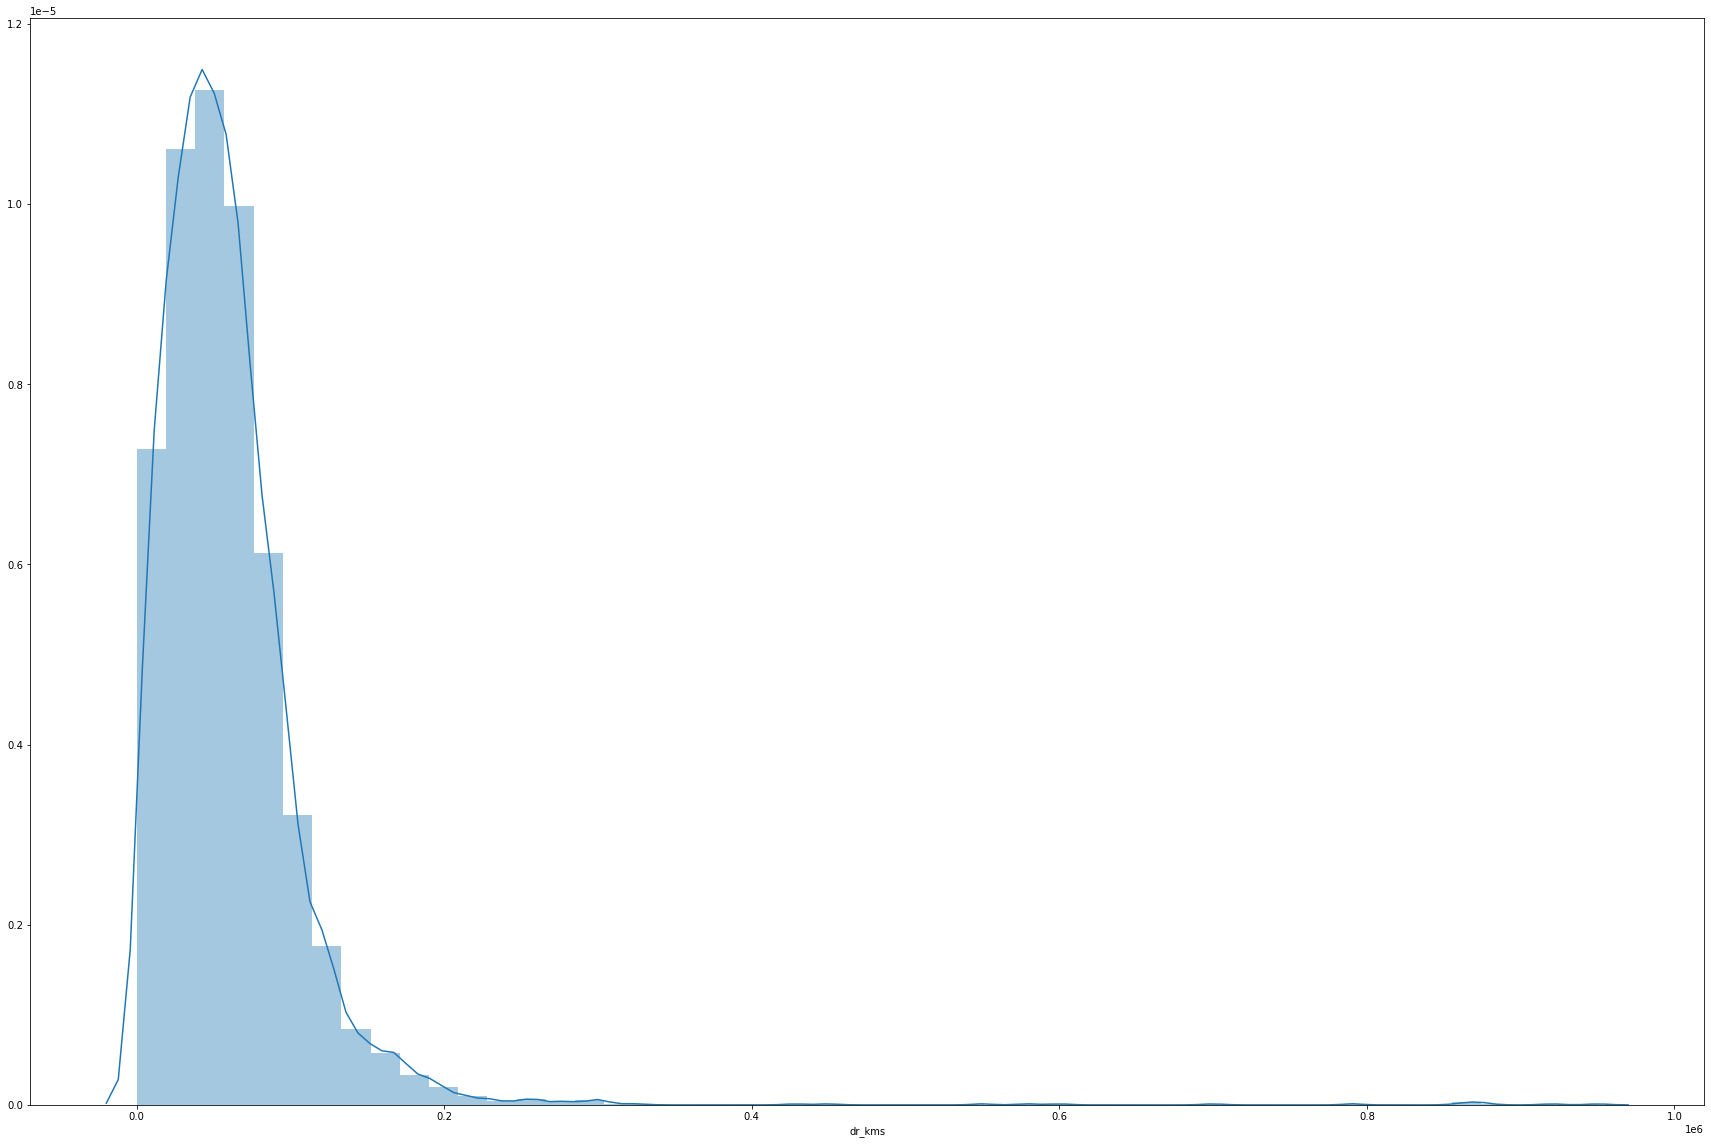

In [431]:
plt.figure(figsize=(30,20))
sns.distplot(data.dr_kms)

In [432]:
#dr_kms is left skwewd

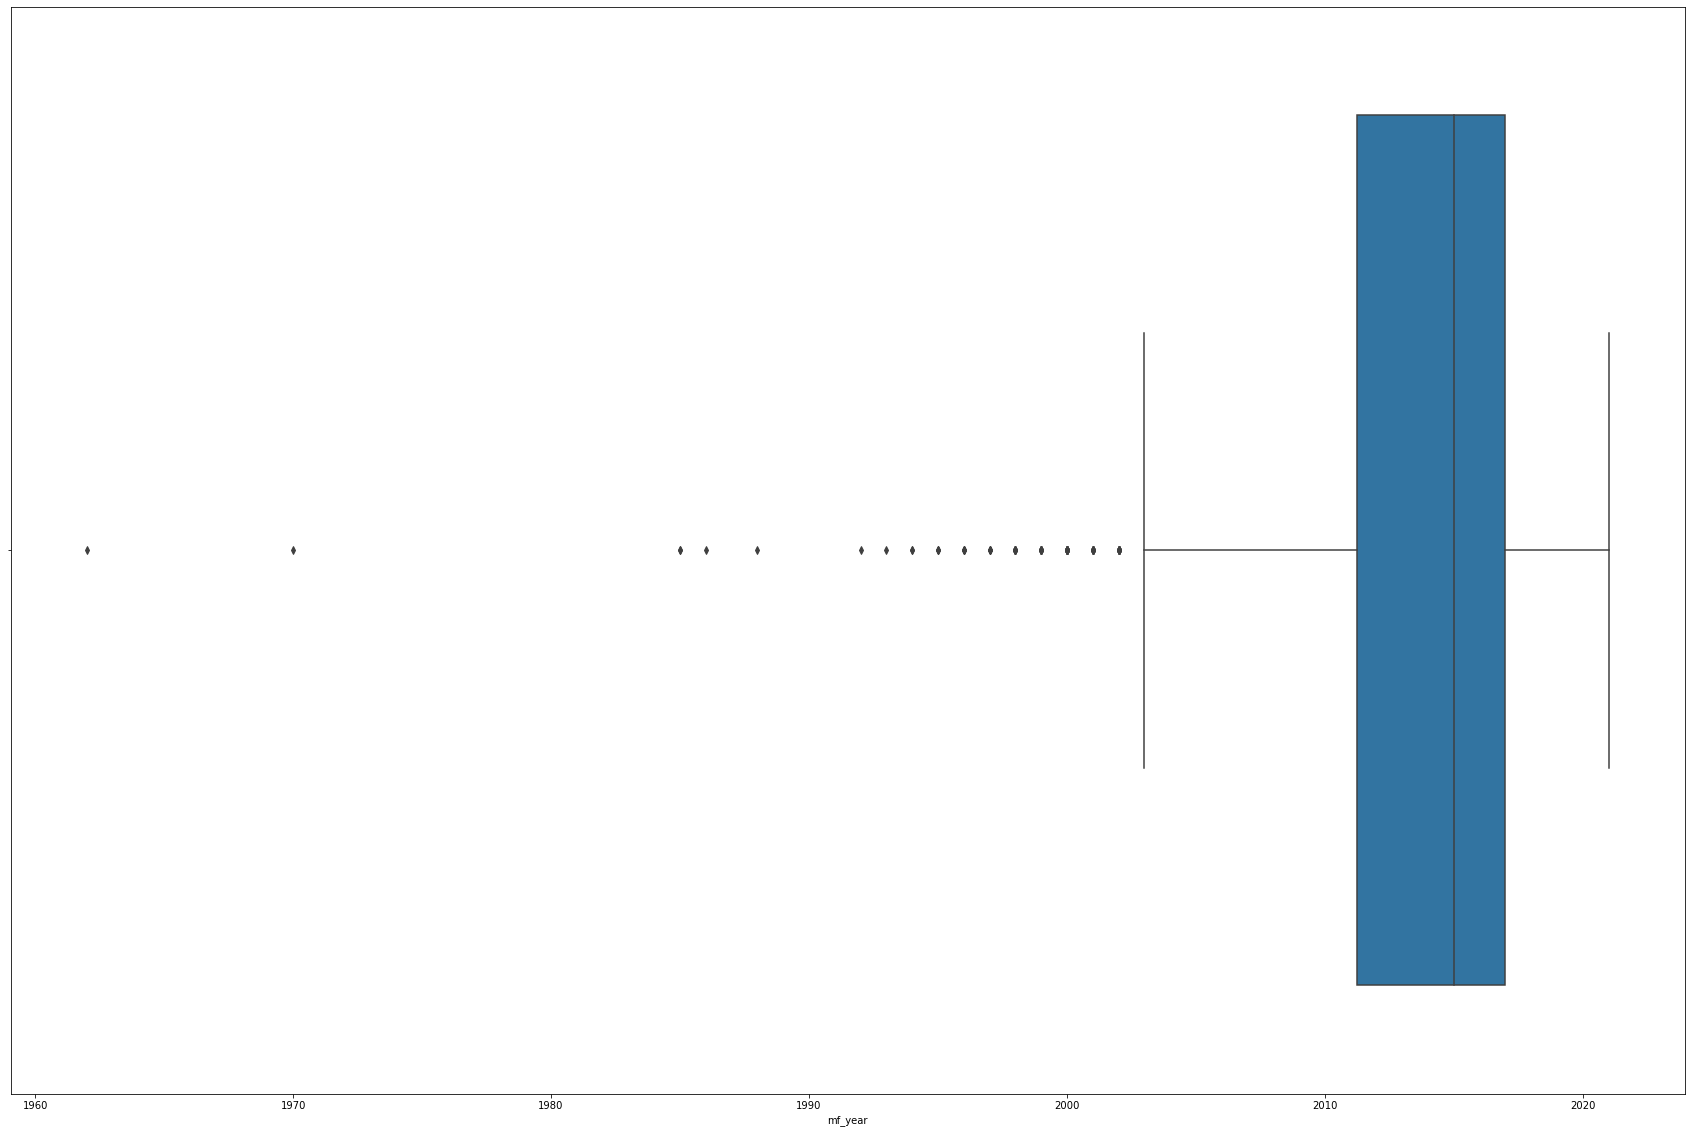

In [433]:
plt.figure(figsize=(30,20))
sns.boxplot(data.mf_year)

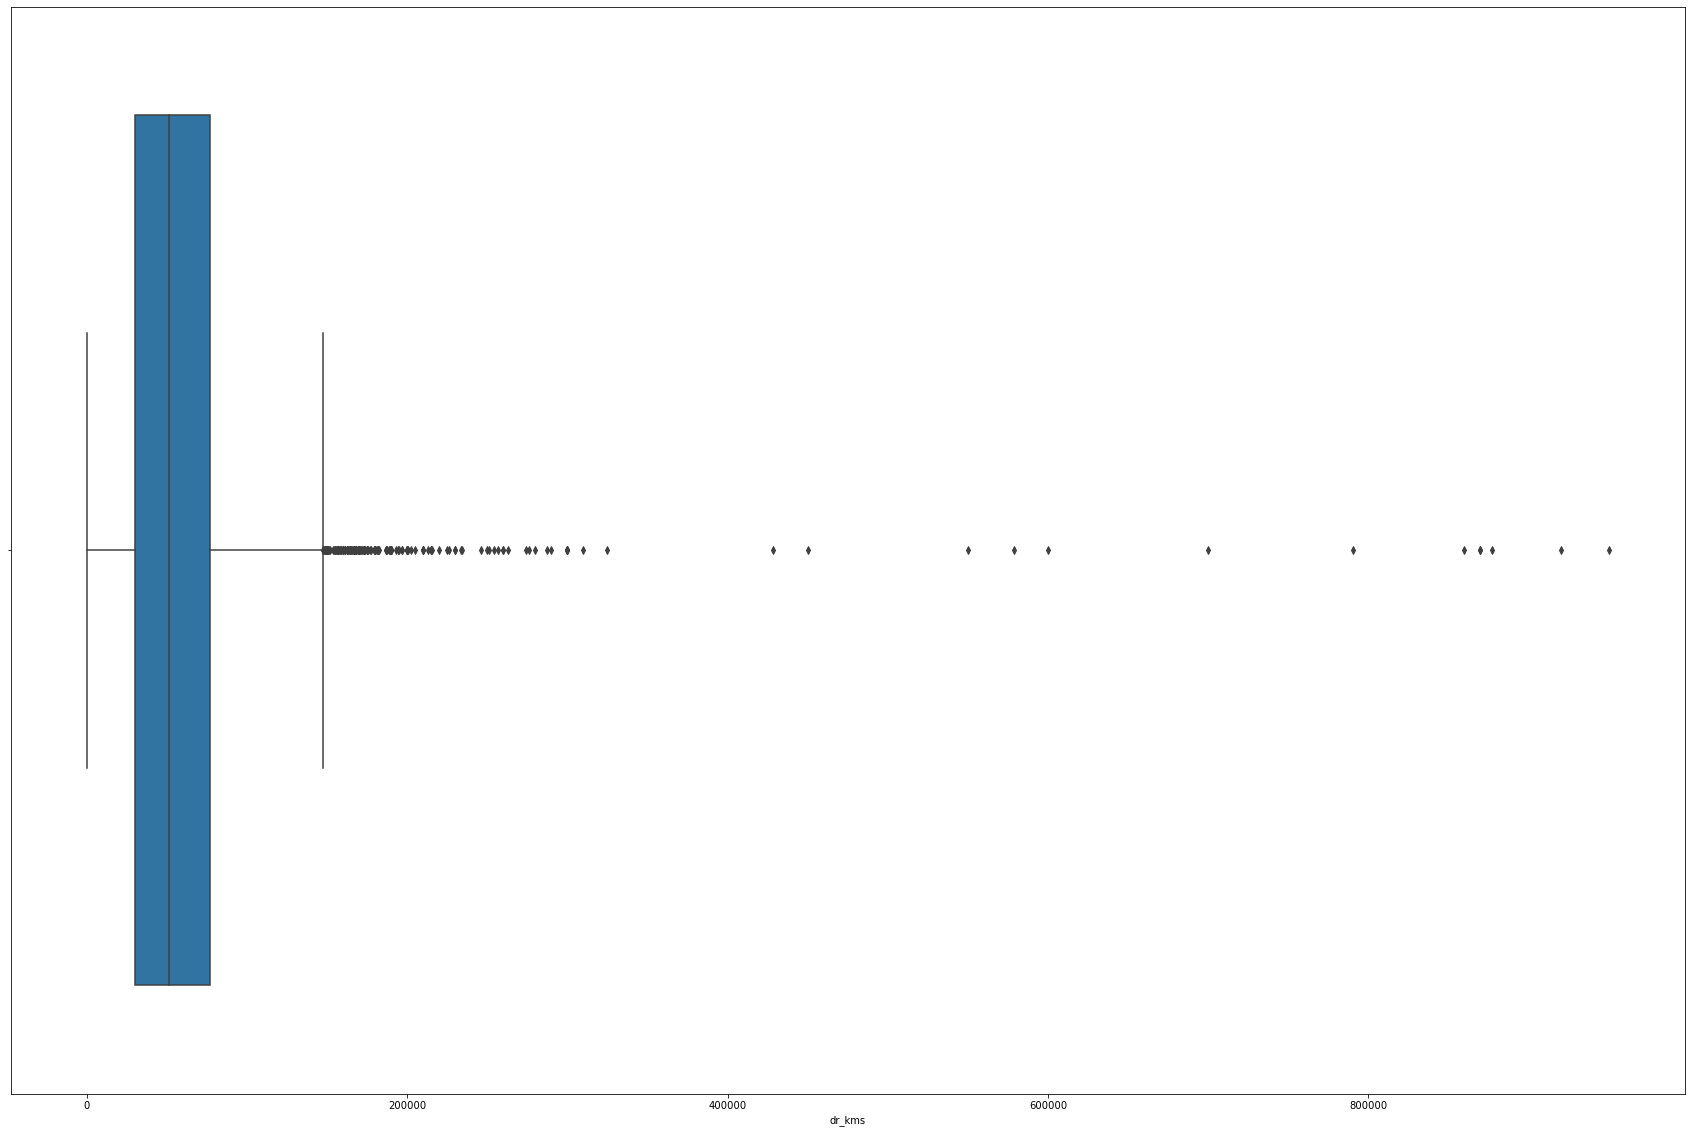

In [434]:
plt.figure(figsize=(30,20))
sns.boxplot(data.dr_kms)

In [435]:
#even though there are outliers as per the plot, decided to keep the data, because this is real values

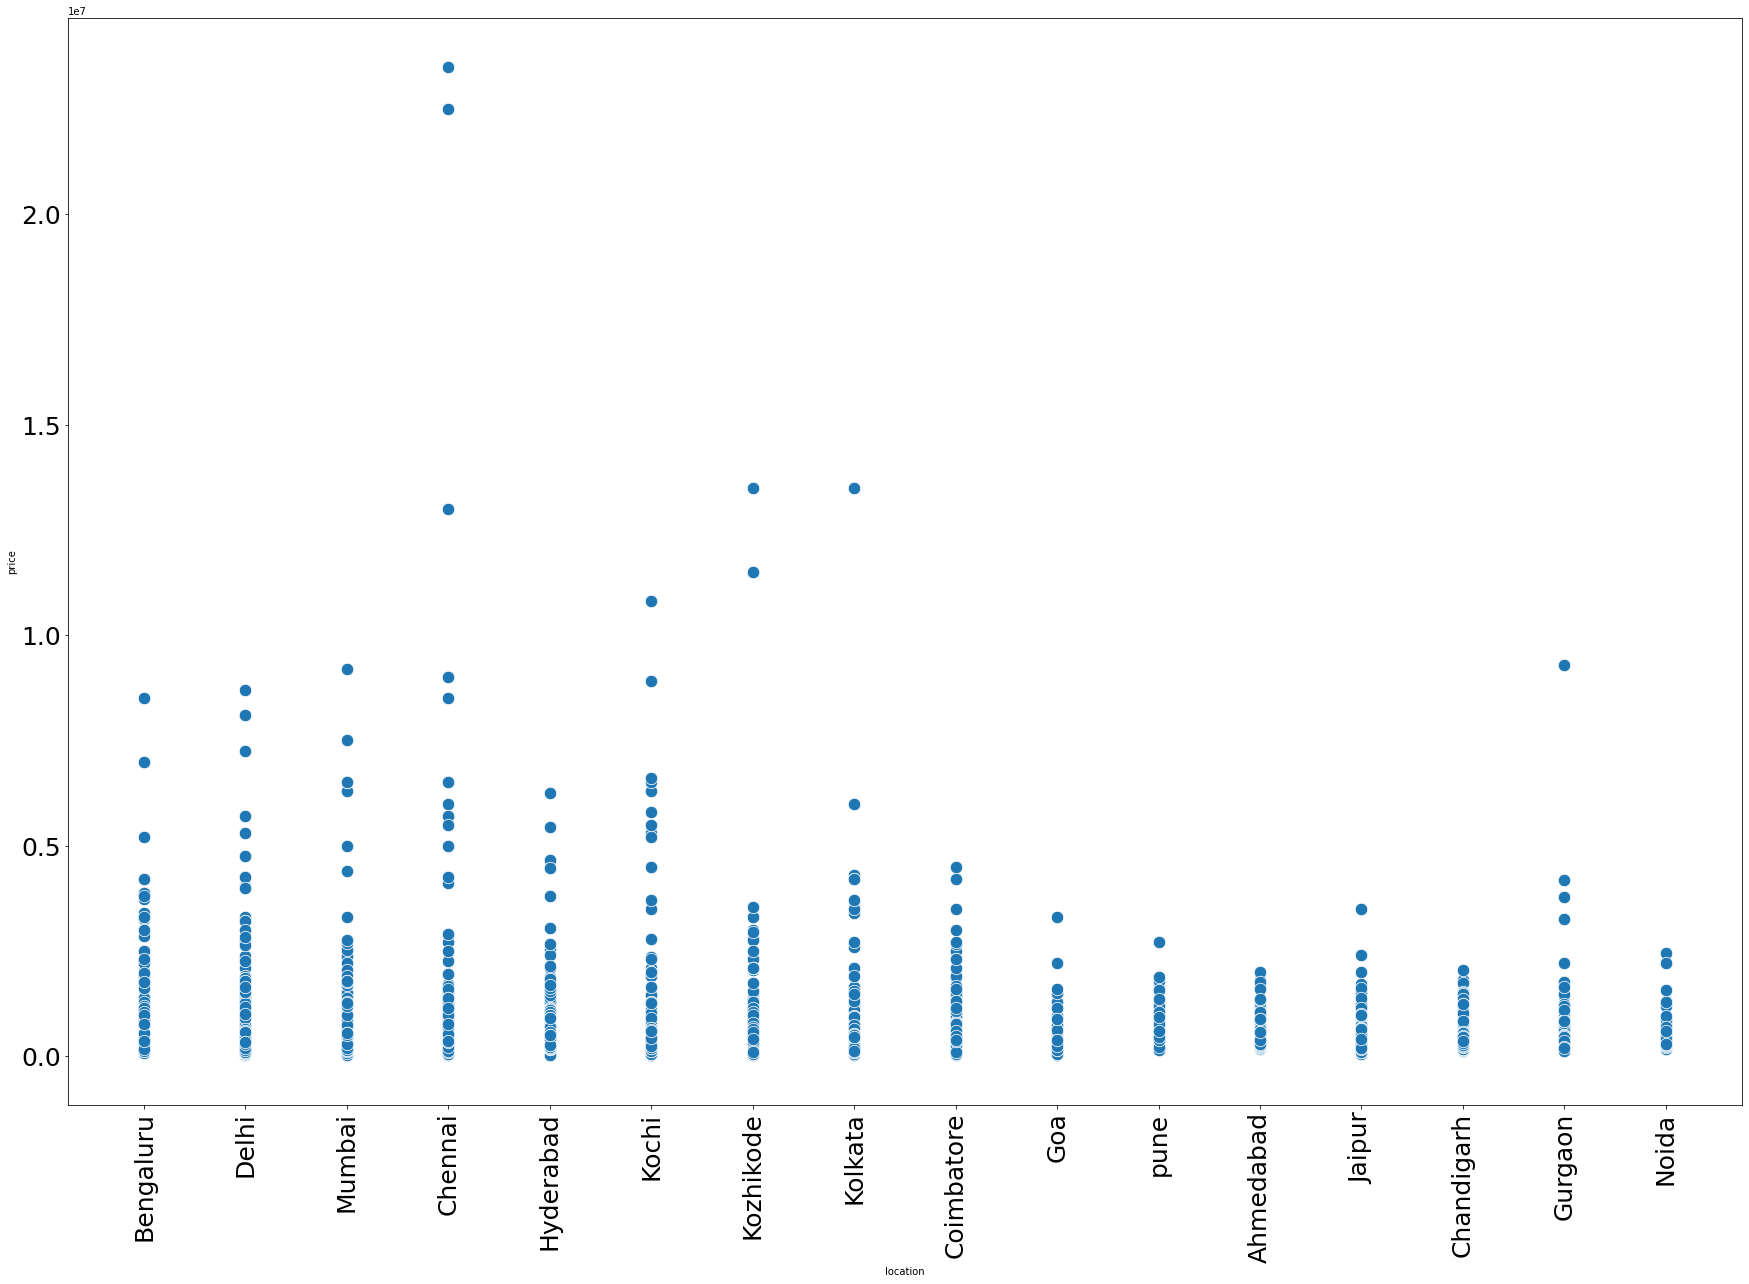

In [436]:
plt.figure(figsize=(30,20))
chart = sns.scatterplot(data.location, data.price, s=155)
chart.tick_params(axis='x', rotation=90, labelsize = 25)
chart.tick_params(axis='y',  labelsize = 25)

In [437]:
#the prices of the car is not much differ from city to city

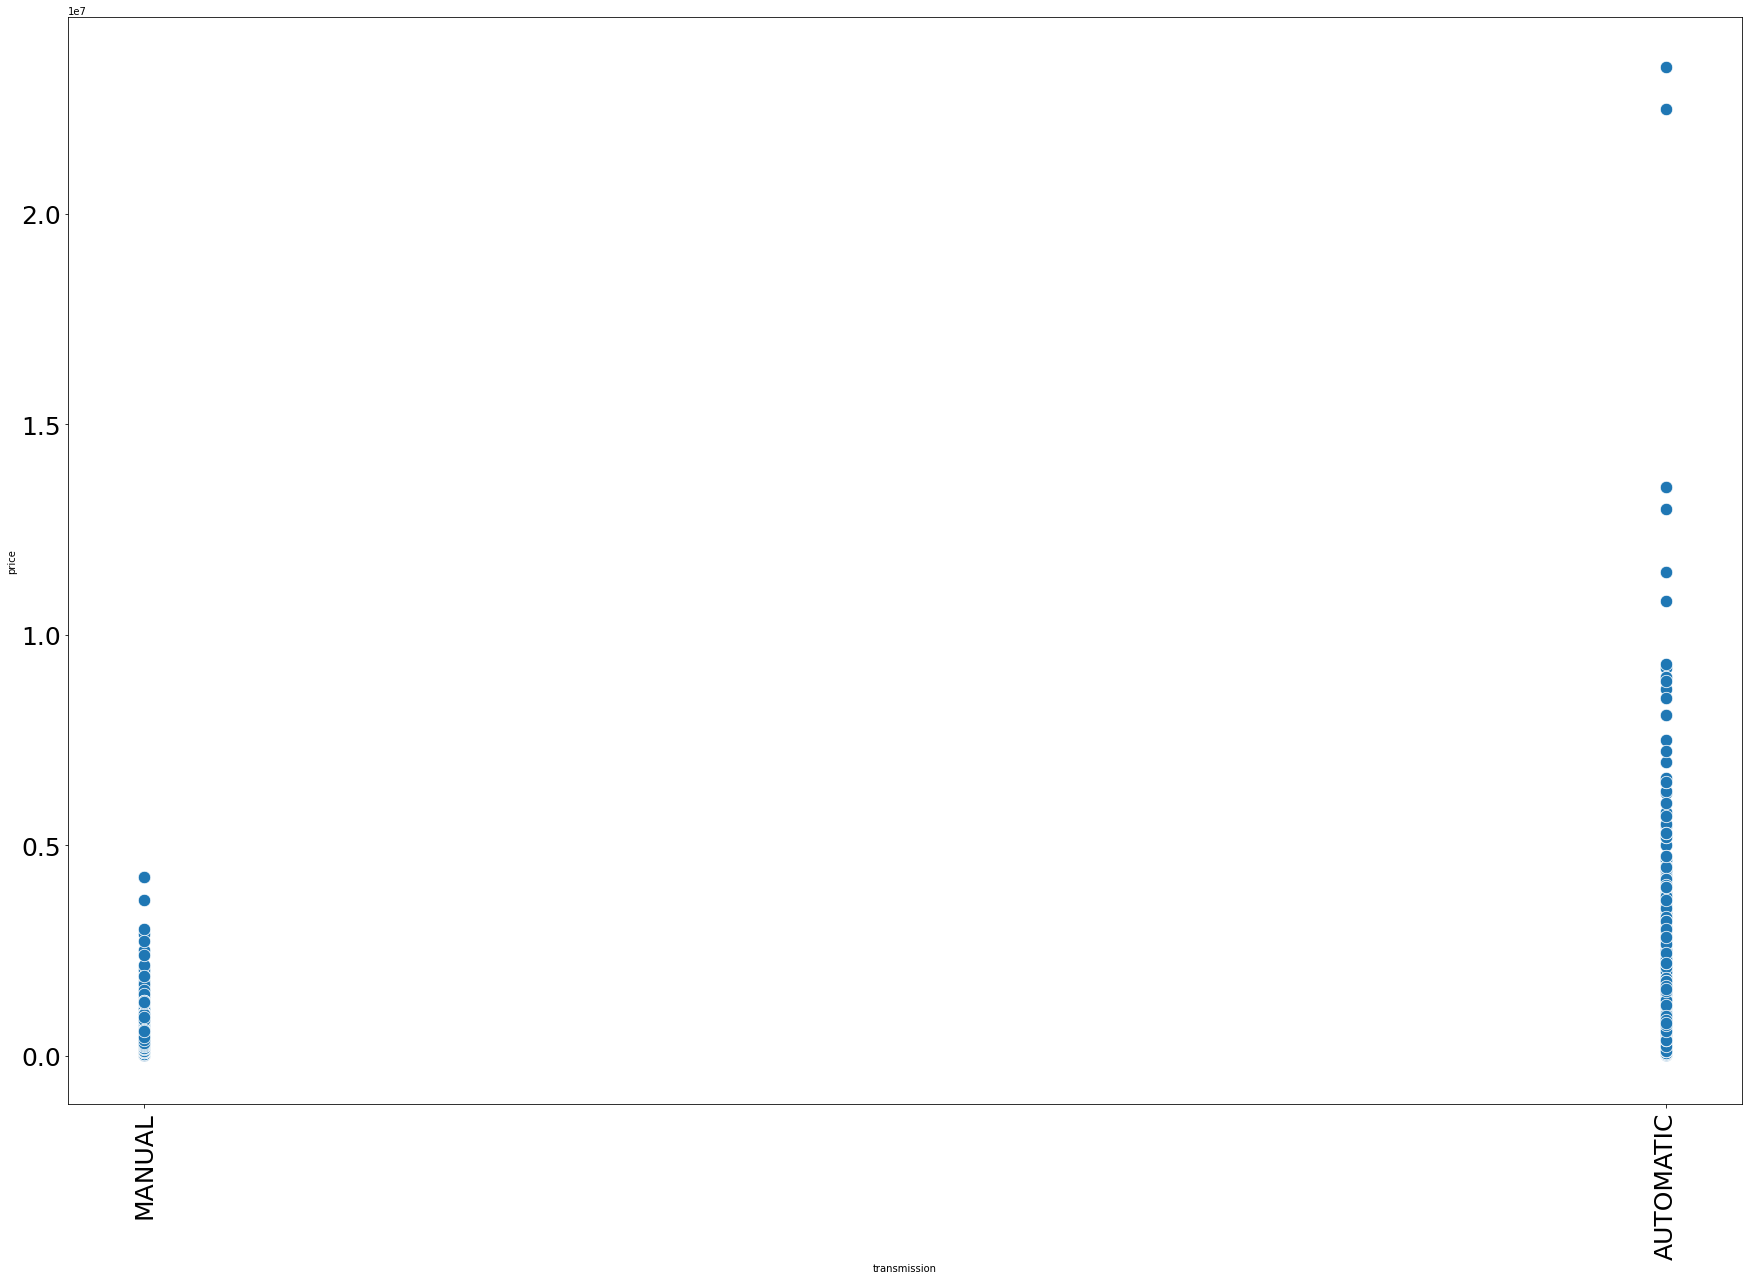

In [438]:
plt.figure(figsize=(30,20))
chart = sns.scatterplot(data.transmission, data.price, s=155)
chart.tick_params(axis='x', rotation=90, labelsize = 25)
chart.tick_params(axis='y',  labelsize = 25)

In [439]:
#automatic cars are more expensive

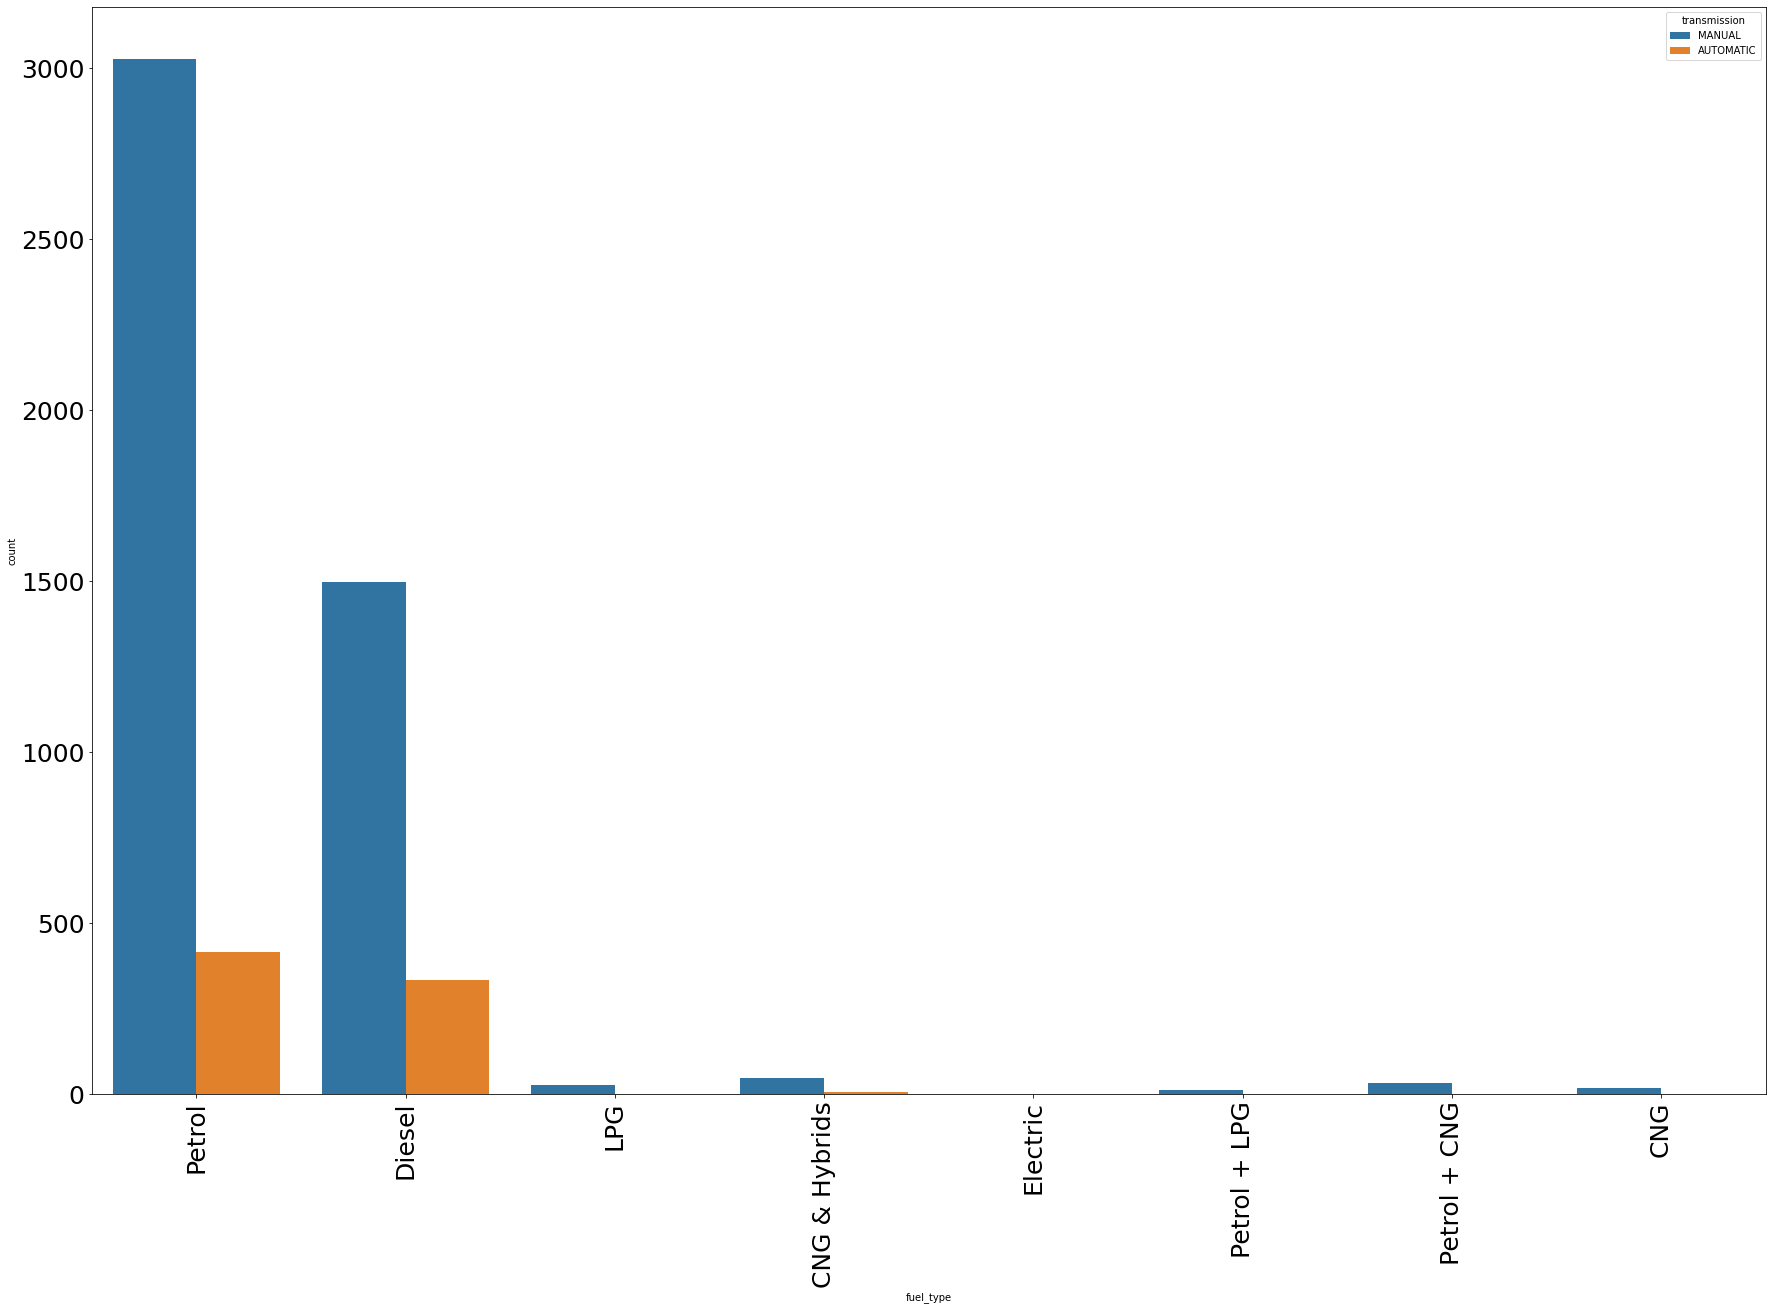

In [440]:
plt.figure(figsize=(30,20))
chart = sns.countplot(data.fuel_type, hue=data.transmission)
chart.tick_params(axis='x', rotation=90, labelsize = 25)
chart.tick_params(axis='y',  labelsize = 25)

In [441]:
#In every fuel type, manual is higher in number than automatic 

In [442]:
#consider a particular brand for a closer observation
swift = data[(data.brand == "Maruti") & (data['model'] =="Swift")]

In [443]:
swift

,brand,model,varient,mf_year,dr_kms,fuel_type,no_of_owners,location,transmission,price
10,Maruti,Swift,VXI,2006,86000,Petrol,Second Owner,Bengaluru,MANUAL,265000
23,Maruti,Swift,VDI,2011,85000,Diesel,Second Owner,Bengaluru,MANUAL,375000
34,Maruti,Swift,VDI,2010,100000,Diesel,Second Owner,Bengaluru,MANUAL,345000
35,Maruti,Swift,VXI,2007,85000,Petrol,Second Owner,Bengaluru,MANUAL,280000
48,Maruti,Swift,VVT VXI,2014,59000,Petrol,First Owner,Bengaluru,MANUAL,525000
...,...,...,...,...,...,...,...,...,...,...
5710,Maruti,Swift,Dzire VDi,2010,140000,Diesel,Second Owner,Noida,MANUAL,175000
5741,Maruti,Swift,VDI BSIV,2015,110000,Diesel,First Owner,Noida,MANUAL,380000
5749,Maruti,Swift,DDiS VDI,2017,30000,Diesel,First Owner,Noida,MANUAL,500000
5752,Maruti,Swift,LXI BSIV,2017,53000,Petrol,First Owner,Noida,MANUAL,480000


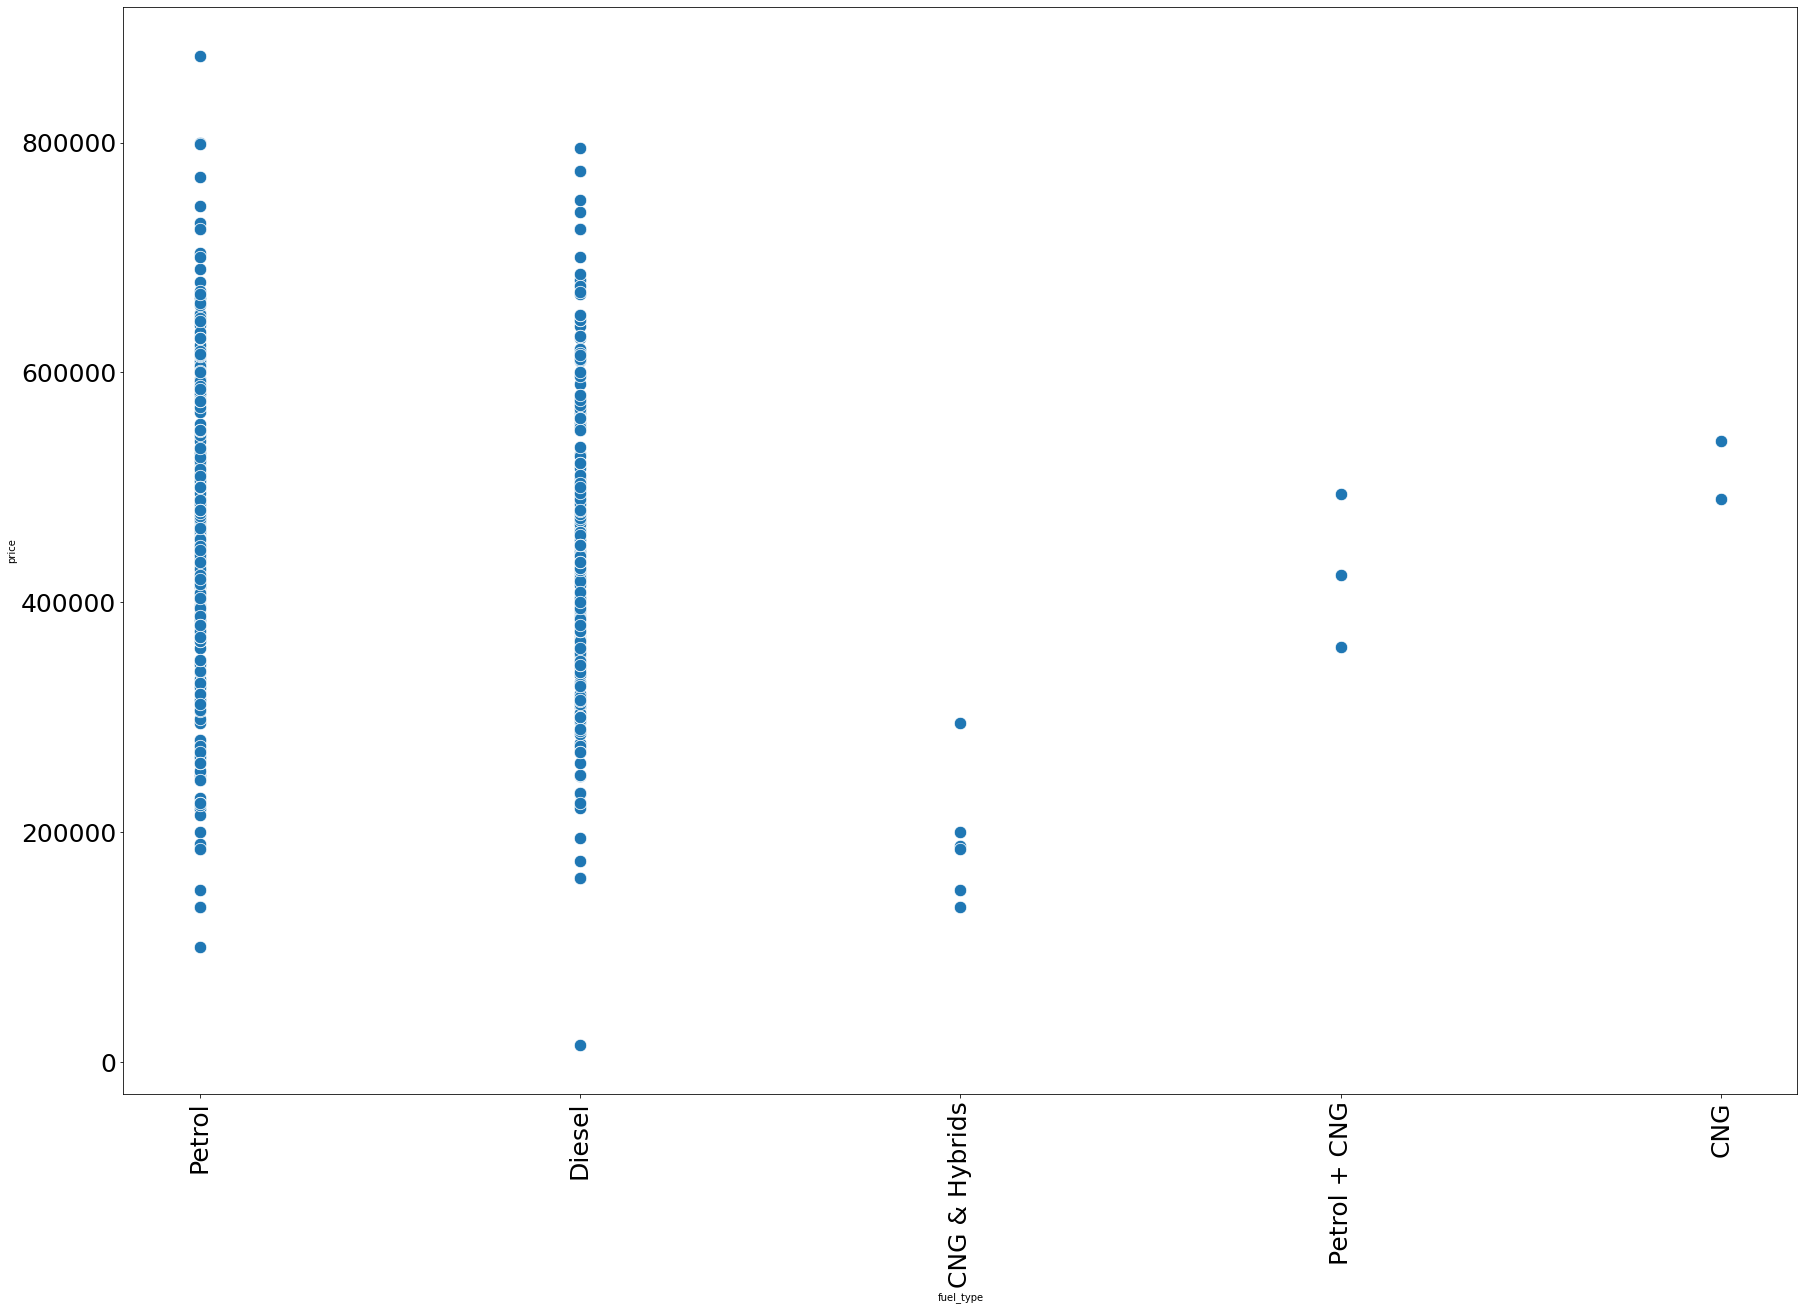

In [444]:
plt.figure(figsize=(30,20))
chart = sns.scatterplot(swift.fuel_type, swift.price, s=155)
chart.tick_params(axis='x', rotation=90, labelsize = 25)
chart.tick_params(axis='y',  labelsize = 25)

In [445]:
#petrol-diesel vaicles are almost in same price range, but others are cheaper

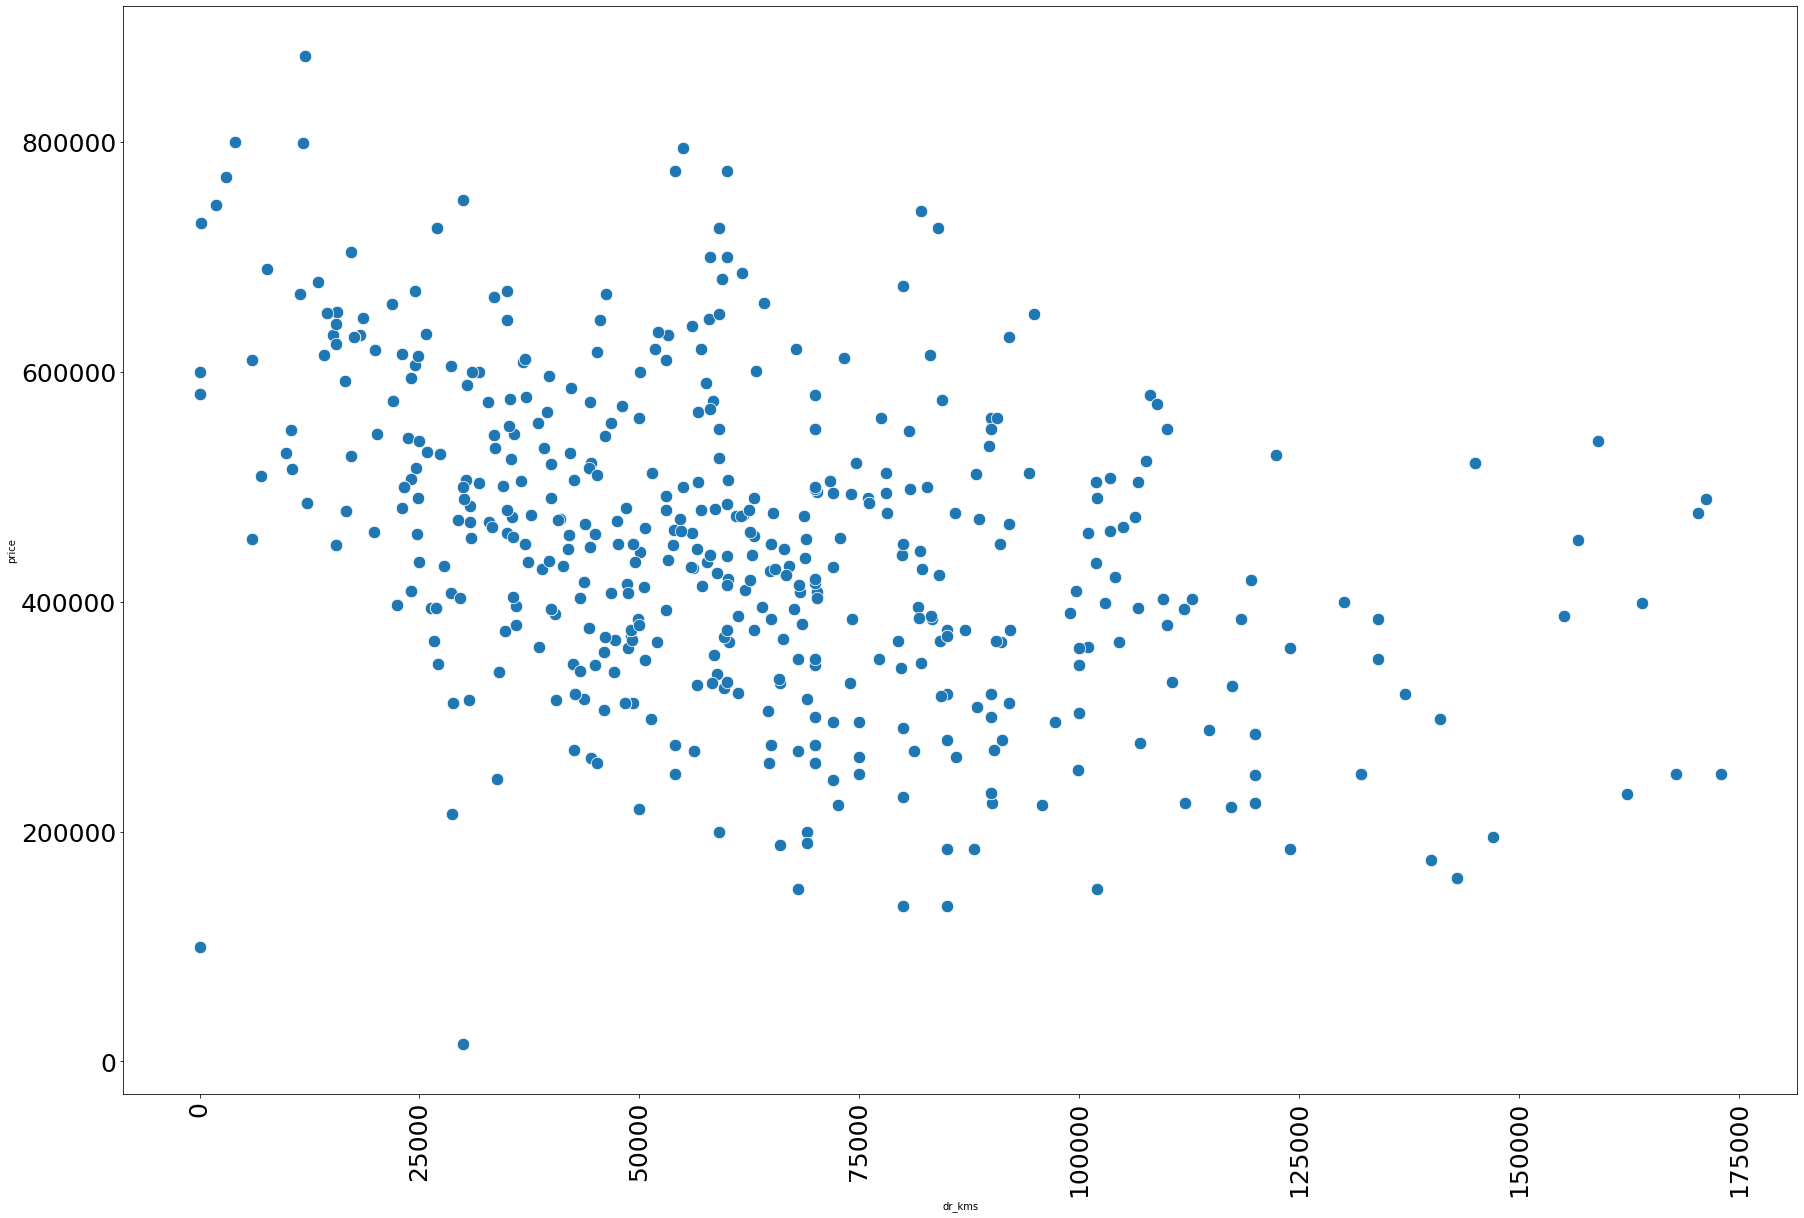

In [446]:
plt.figure(figsize=(30,20))
chart = sns.scatterplot(swift.dr_kms, swift.price, s=155)
chart.tick_params(axis='x', rotation=90, labelsize = 25)
chart.tick_params(axis='y',  labelsize = 25)

In [447]:
#When the driven kilometers are high, price is less

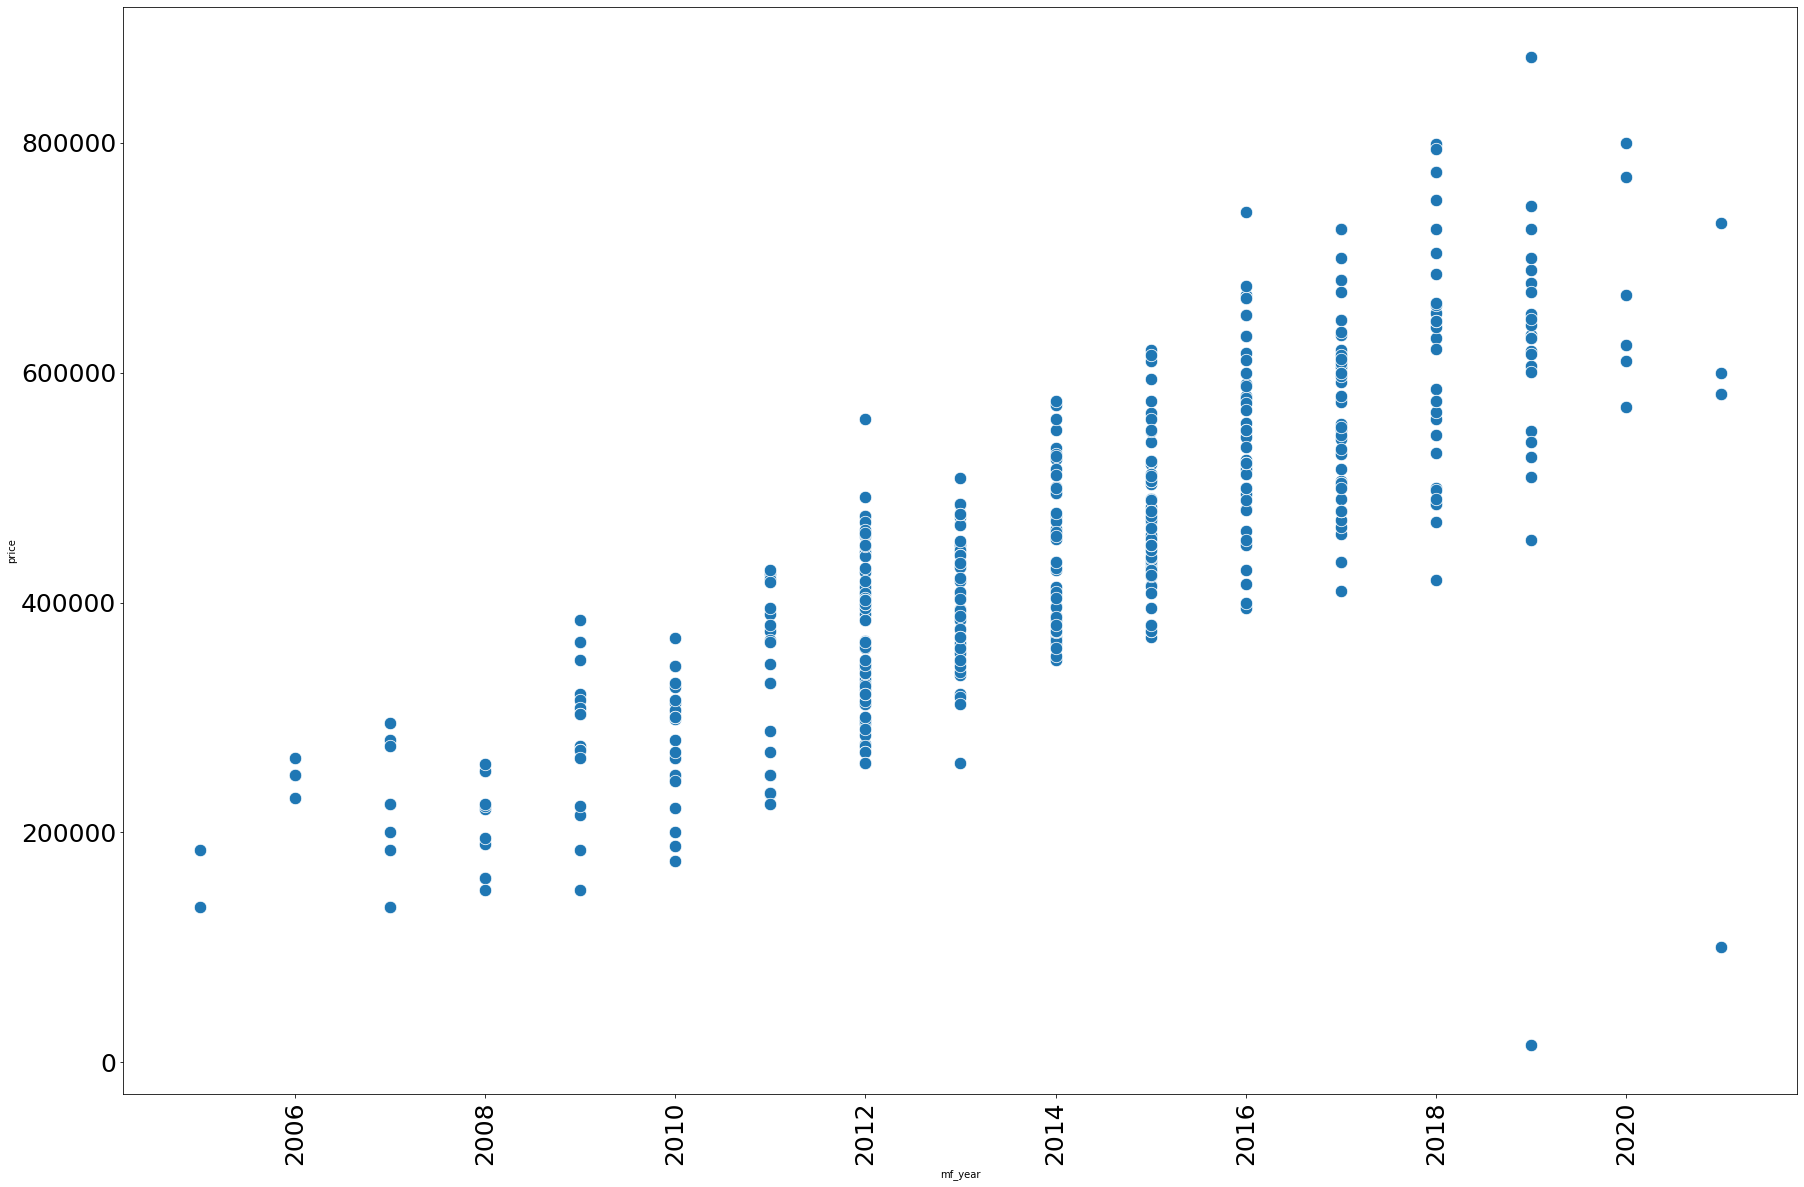

In [448]:
plt.figure(figsize=(30,20))
chart = sns.scatterplot(swift.mf_year, swift.price, s=155)
chart.tick_params(axis='x', rotation=90, labelsize = 25)
chart.tick_params(axis='y',  labelsize = 25)

In [449]:
#newer the vehicle, higher will be the price

In [450]:
corr = data.corr()

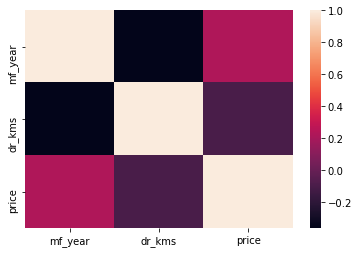

In [451]:
sns.heatmap(corr)

In [452]:
#not much correlation is found between the variables
#driven kilometers and mf year are highly -ve correlated

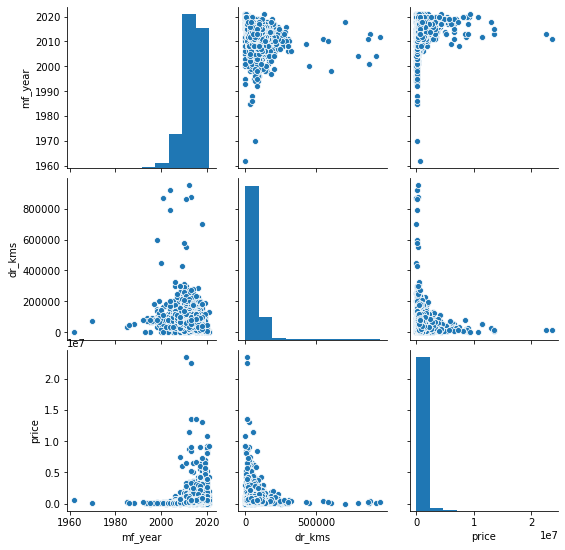

In [453]:
sns.pairplot(data)

In [454]:
data.skew()

mf_year    -1.582598
dr_kms      6.742232
price      10.181206
dtype: float64

In [455]:
#removing skewness

In [ ]:
data["mf_year"] = np.sqrt(data["mf_year"])[0]
data["dr_kms"] = np.sqrt(data["dr_kms"])[0]

In [459]:
#Encoding
from sklearn.preprocessing import LabelEncoder
cat_cols = ["brand", "model", "varient", "fuel_type", "no_of_owners", "location", "transmission"]
for col in cat_cols:
    data[col] = LabelEncoder().fit_transform(data[col])

<ipython-input-459-c03d02d7df92>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = LabelEncoder().fit_transform(data[col])


In [460]:
data

,brand,model,varient,mf_year,dr_kms,fuel_type,no_of_owners,location,transmission,price
0,17,80,864,44.888751,268.328157,5,0,1,1,625000
1,29,181,772,44.888751,268.328157,5,3,1,1,290000
2,29,250,1520,44.888751,268.328157,2,0,1,1,710000
3,39,209,224,44.888751,268.328157,2,3,1,1,415000
4,29,280,1195,44.888751,268.328157,5,0,1,1,395000
...,...,...,...,...,...,...,...,...,...,...
5776,29,249,1672,44.888751,268.328157,2,0,15,1,615000
5777,17,309,1272,44.888751,268.328157,5,0,15,0,765500
5778,29,276,882,44.888751,268.328157,2,0,15,1,919999
5779,17,309,1455,44.888751,268.328157,5,0,15,1,445000


In [462]:
x = data.iloc[:,:-1]

In [464]:
y = data.iloc[:,-1]

In [466]:
#scaling
from sklearn.preprocessing import MinMaxScaler

In [468]:
scaler = MinMaxScaler()
x = scaler.fit_transform(x)

In [470]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [471]:
#finding best random state
max_acc = 0
max_rs = 0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = .22, random_state = i)
    lr = LinearRegression()
    lr.fit(x_train, y_train)
    pred = lr.predict(x_test)
    r2 = r2_score(y_test, pred)
    if r2 > max_acc:
        max_acc = r2
        max_rs = i
print("Best random state=",max_rs)

Best random state= 44


In [472]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = .22, random_state = 44)

In [473]:
models = {"SVR":SVR(),"KNN":KNeighborsRegressor(), "RandomForest":RandomForestRegressor(),"LinearRegression":LinearRegression(), "Ridge":Ridge(), "dtr":DecisionTreeRegressor() }
acc = {}
mod_list = []
for i in models:
    mod = i
    mod = models[i]
    #mod = DecisionTreeRegressor()
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    r2_sc = r2_score(y_test,pred)
    acc[i] = r2_sc
    mod_list.append(mod)
print(acc)

{'SVR': -0.0707094524706493, 'KNN': 0.07796397166290003, 'RandomForest': 0.6795644983907959, 'LinearRegression': 0.3004545957412963, 'Ridge': 0.30056226290448196, 'dtr': -0.04712406671229963}


In [474]:
#applying cross validation
from sklearn.model_selection import cross_val_score

In [475]:
cv_list = {}
for i in mod_list:
    cv = cross_val_score(i, x, y, cv=7)
    cv_list[str(i)] = cv.mean()
print(cv_list)

{'SVR()': -0.06650759687230996, 'KNeighborsRegressor()': -0.152925304593077, 'RandomForestRegressor()': 0.4945771339780726, 'LinearRegression()': 0.04401183838568312, 'Ridge()': 0.044926581112321, 'DecisionTreeRegressor()': -0.02506977862878685}


In [476]:
#Randomforest is the best model

In [477]:

#hyperparameter tuning
from sklearn.model_selection import GridSearchCV

In [478]:

param_grid = {  'bootstrap': [True], 'max_depth': [5, 10, None], 'max_features': ['auto', 'log2'], 'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]}

In [479]:
GCV = GridSearchCV(RandomForestRegressor(),param_grid=param_grid, cv=7)

In [480]:
GCV.fit(x_train, y_train)

GridSearchCV(cv=7, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True], 'max_depth': [5, 10, None],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]})

In [481]:
GCV.best_params_

{'bootstrap': True,
 'max_depth': None,
 'max_features': 'log2',
 'n_estimators': 8}

In [482]:
GCV_predict = GCV.best_estimator_.predict(x_test)

In [483]:

r2_score(y_test, GCV_predict)

0.6542813985691986

In [484]:
#saving model
import joblib
joblib.dump(GCV.best_estimator_, "car_price.obj")

['car_price.obj']